In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import os, glob
import libstempo as T2
from libstempo import toasim as LT
from libstempo import plot as LP
import enterprise
from enterprise.pulsar import Pulsar
from simFuncs import *

/home/mattm/miniforge3/envs/discotech/lib/python3.12/site-packages/enterprise/signals/utils.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import Requirement, resource_filename


In [2]:
datadir = '/home/mattm/projects/HSYMT/partim_real/tdb/'
rand_select = np.random.randint(0, 82, size=10)

parfiles = sorted(glob.glob(datadir + '/*.par'))
timfiles = sorted(glob.glob(datadir + '/*.tim'))

parfiles = np.array(parfiles)[[rand_select]].tolist()[0]
timfiles = np.array(timfiles)[[rand_select]].tolist()[0]

In [3]:
# define observation times and duration
# Tobs = 4.0 # years
# deltaT = 26.0 # points per year
# obstimes = 53000.0 + np.arange(0.0, Tobs*365.25, 365.25/20.0)
# tref = obstimes[0]*86400.0

In [4]:
parfiles

['/home/mattm/projects/HSYMT/partim_real/tdb/J1125-6014_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1737-0811_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J2229+2643_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1101-6424_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1421-4409_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1036-8317_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J2124-3358_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1744-1134_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1600-3053_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1747-4036_tdb.par']

In [5]:
# create pulsar objects from parfiles
# default TOA errors are set to 0.4 microseconds
psrs = []
psrs = create_ideal_psrs(parfiles, timfiles=timfiles)

/home/mattm/projects/HSYMT/partim_real/tdb/J1125-6014_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1737-0811_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J2229+2643_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1101-6424_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1421-4409_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1036-8317_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J2124-3358_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1744-1134_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1600-3053_tdb.par
/home/mattm/projects/HSYMT/partim_real/tdb/J1747-4036_tdb.par


In [6]:
# Add achromatic red noise

psrs, red_noise = add_red(psrs,rand=True)
print("Red noise added")
print(red_noise)

Red noise added
{'J1125-6014': {'red_amp': 6.262448173302008e-14, 'red_gamma': 2.2899469644666617}, 'J1737-0811': {'red_amp': 3.520675202921818e-14, 'red_gamma': 3.264247566370053}, 'J2229+2643': {'red_amp': 3.120101041876985e-14, 'red_gamma': 3.884267412747815}, 'J1101-6424': {'red_amp': 9.615009363623639e-14, 'red_gamma': 5.700588304440868}, 'J1421-4409': {'red_amp': 1.1773681558910793e-14, 'red_gamma': 1.859295771158864}, 'J1036-8317': {'red_amp': 5.882403870604978e-14, 'red_gamma': 6.3741255473857725}, 'J2124-3358': {'red_amp': 8.791783253182866e-15, 'red_gamma': 1.5626675051161436}, 'J1744-1134': {'red_amp': 7.898780467289921e-14, 'red_gamma': 3.931144398524654}, 'J1600-3053': {'red_amp': 8.865735016328263e-14, 'red_gamma': 4.310641570120351}, 'J1747-4036': {'red_amp': 7.631188651925404e-14, 'red_gamma': 3.233362748067647}}


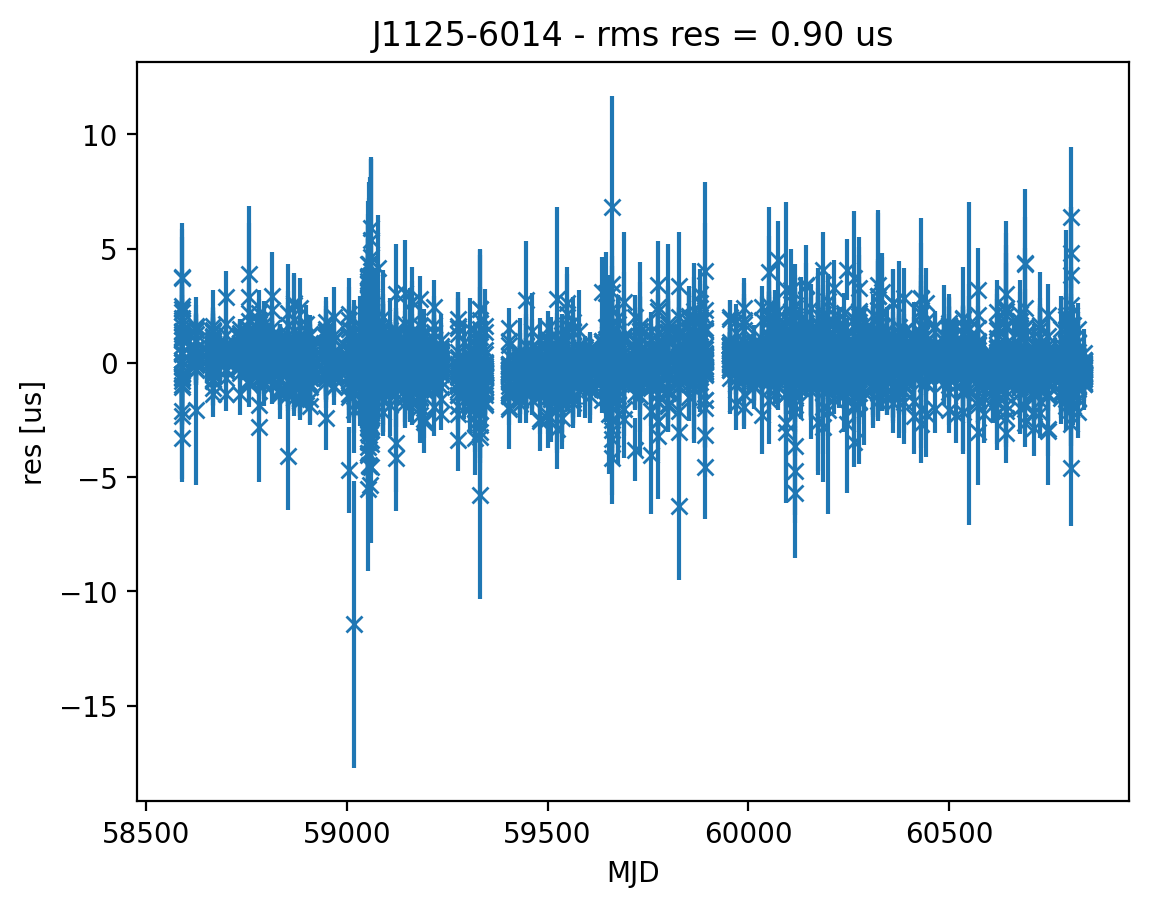

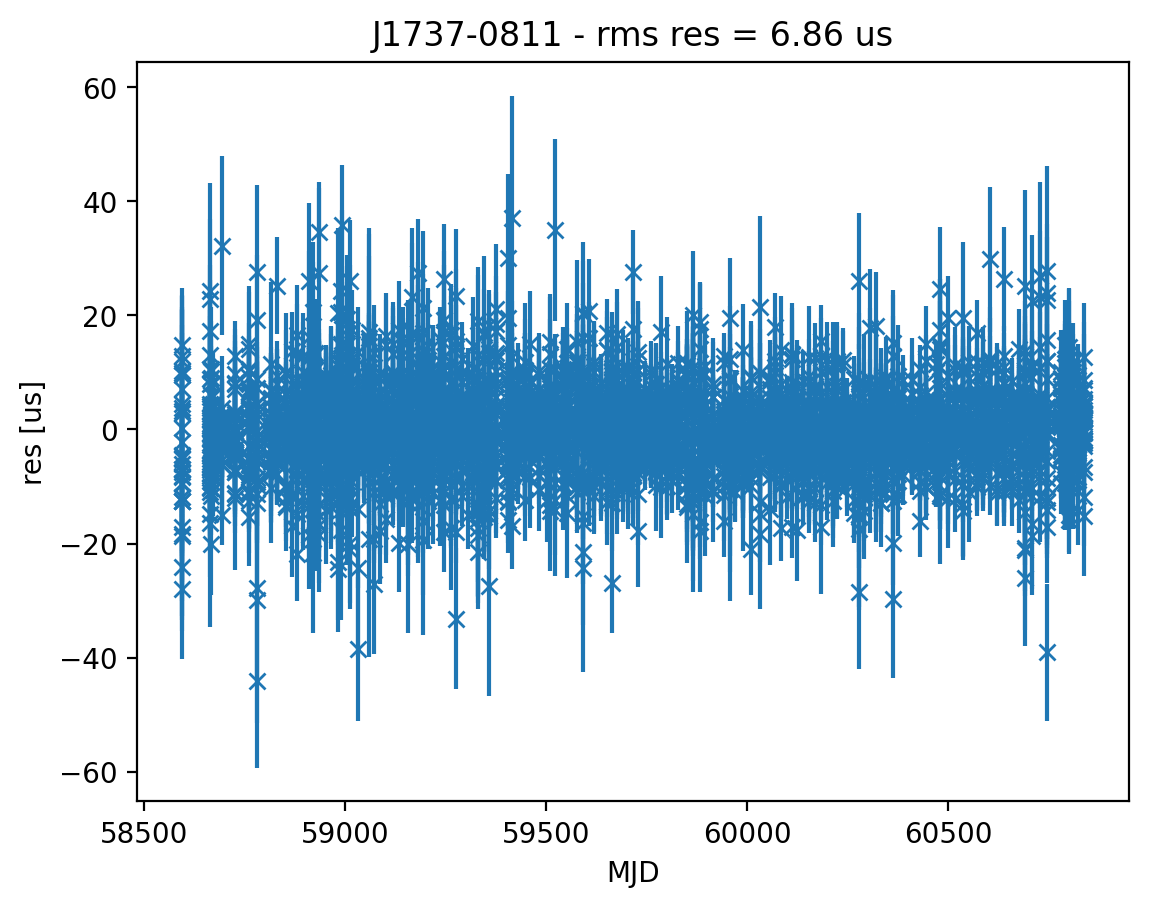

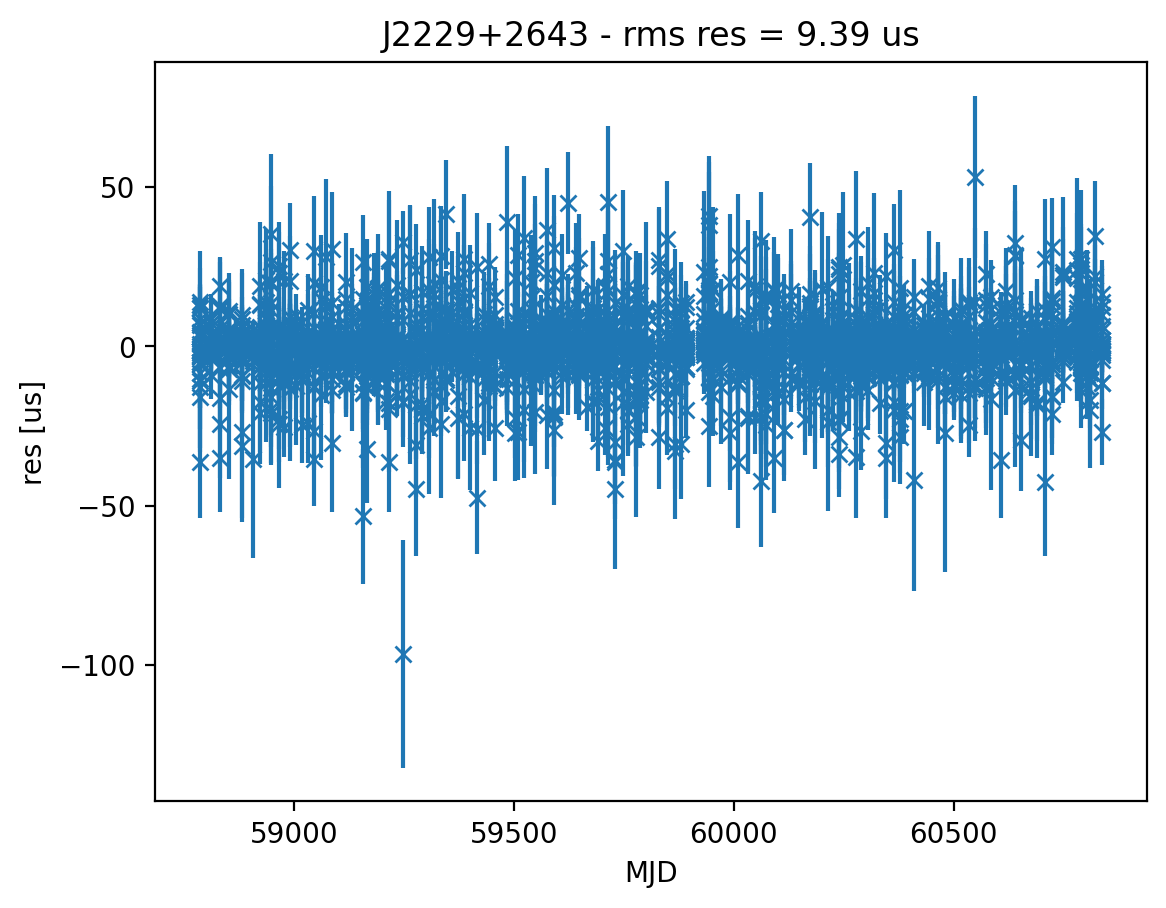

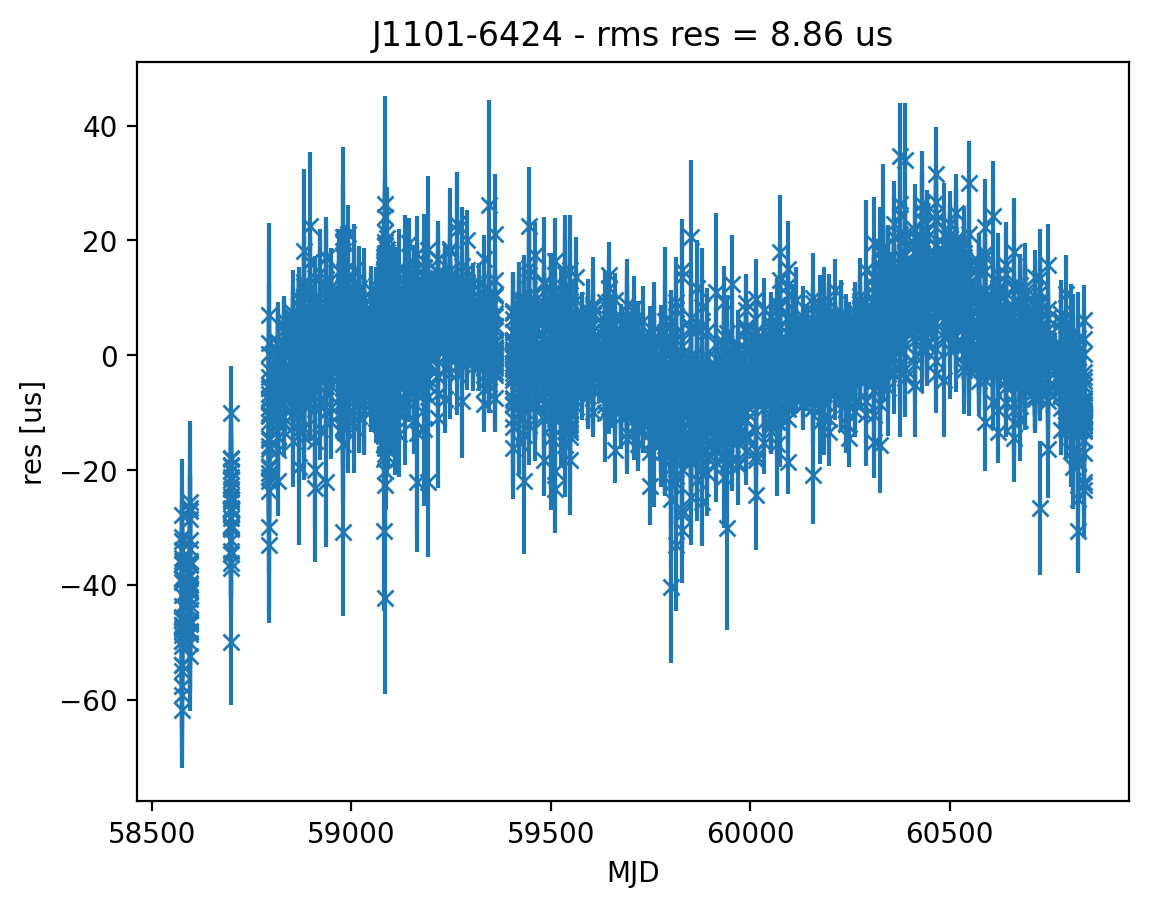

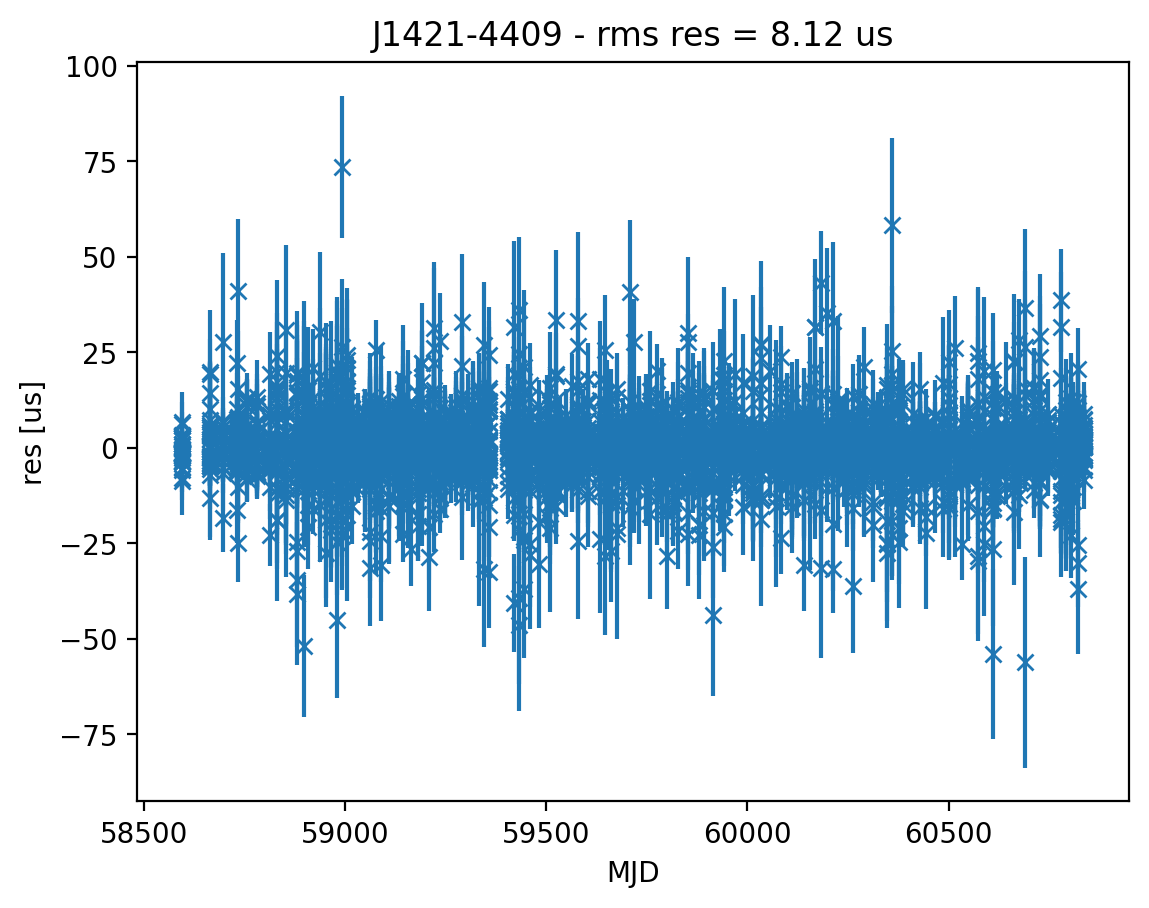

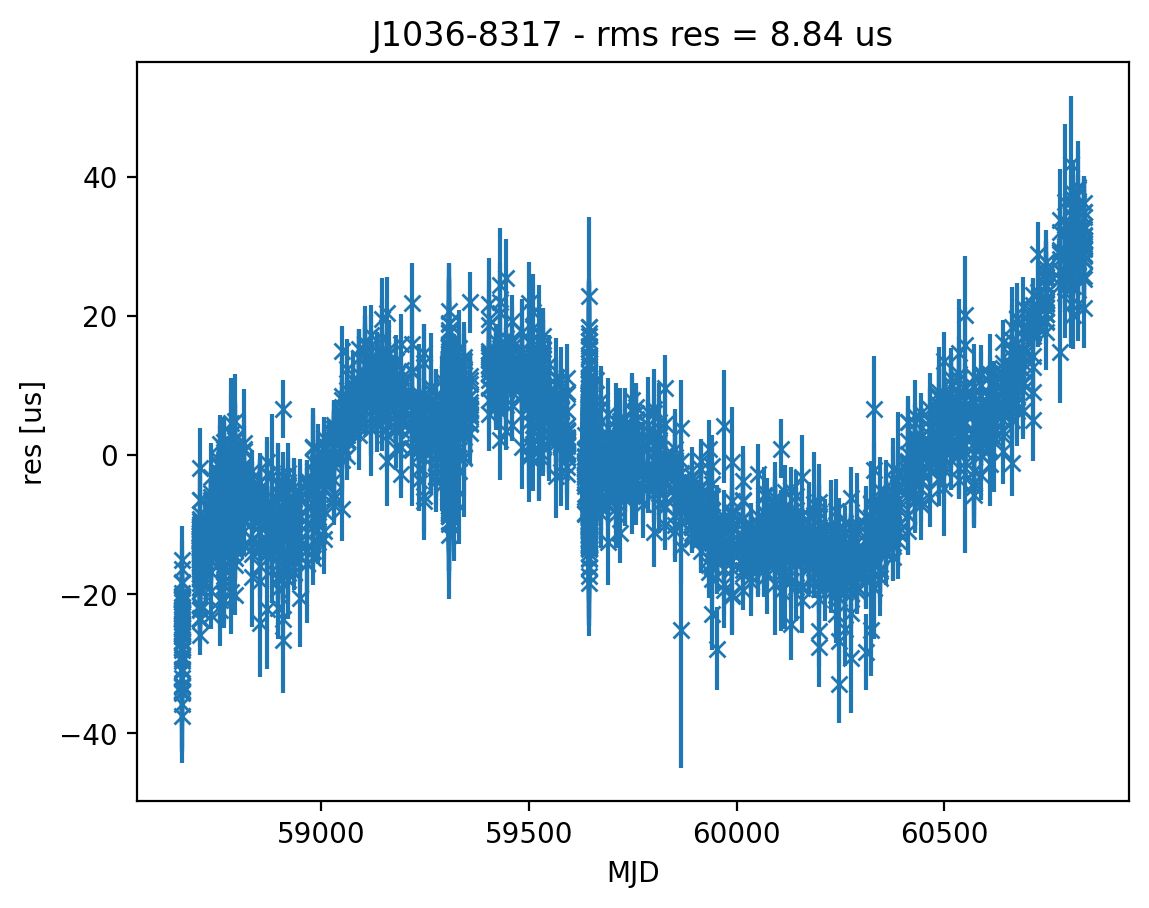

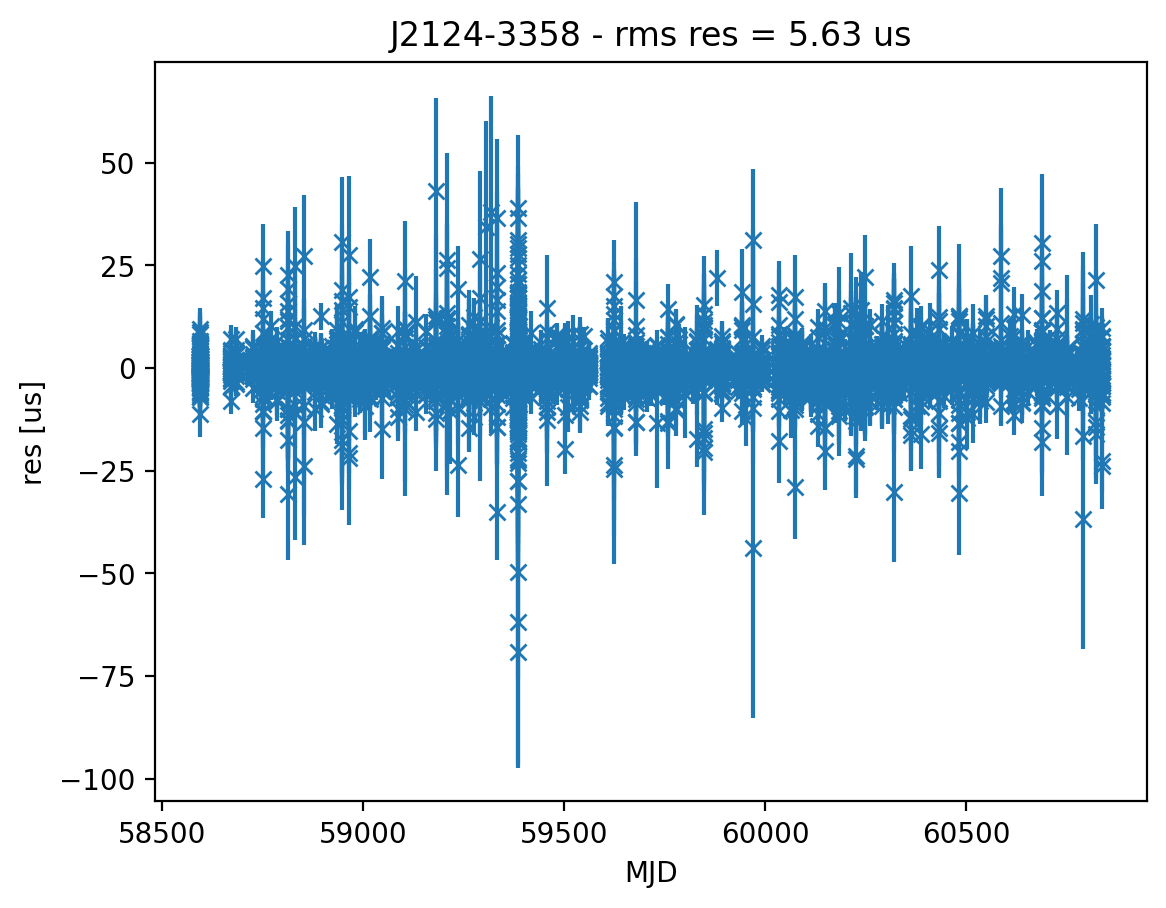

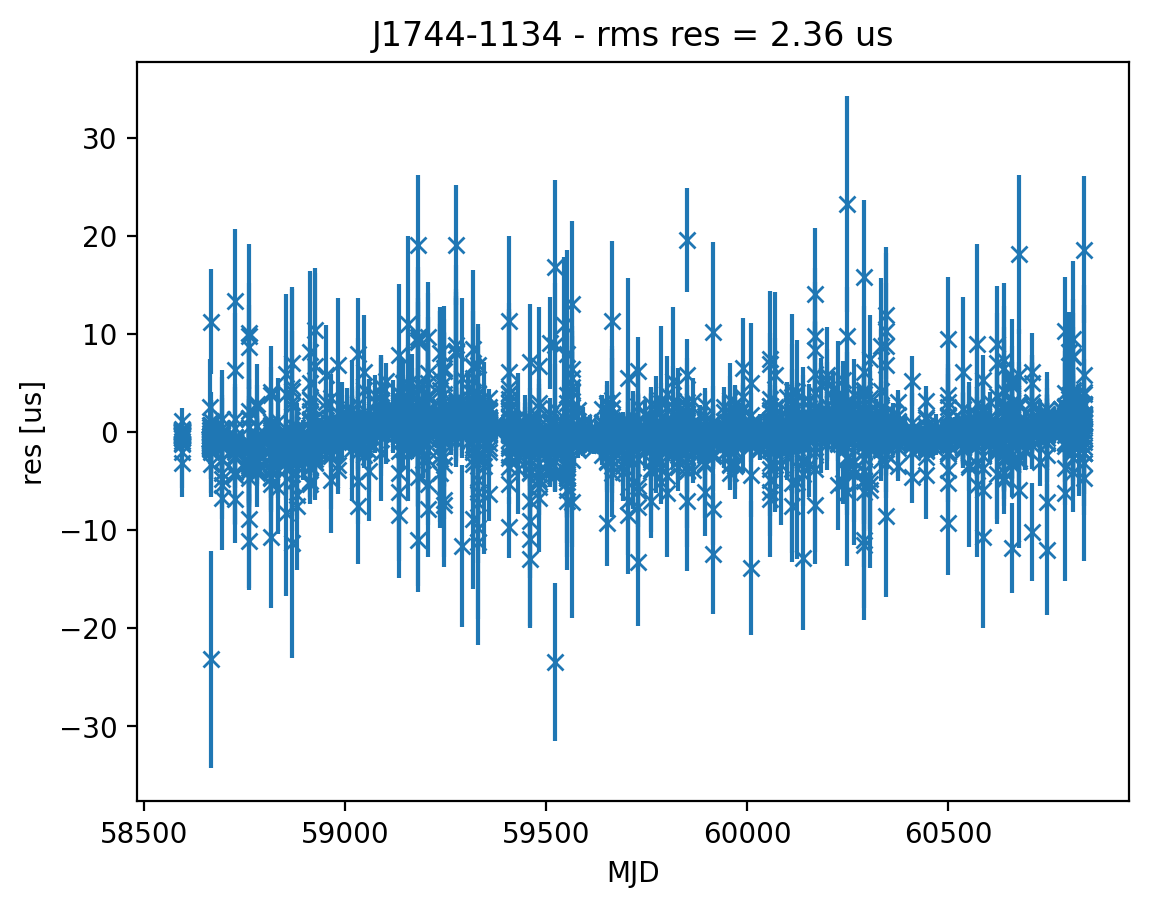

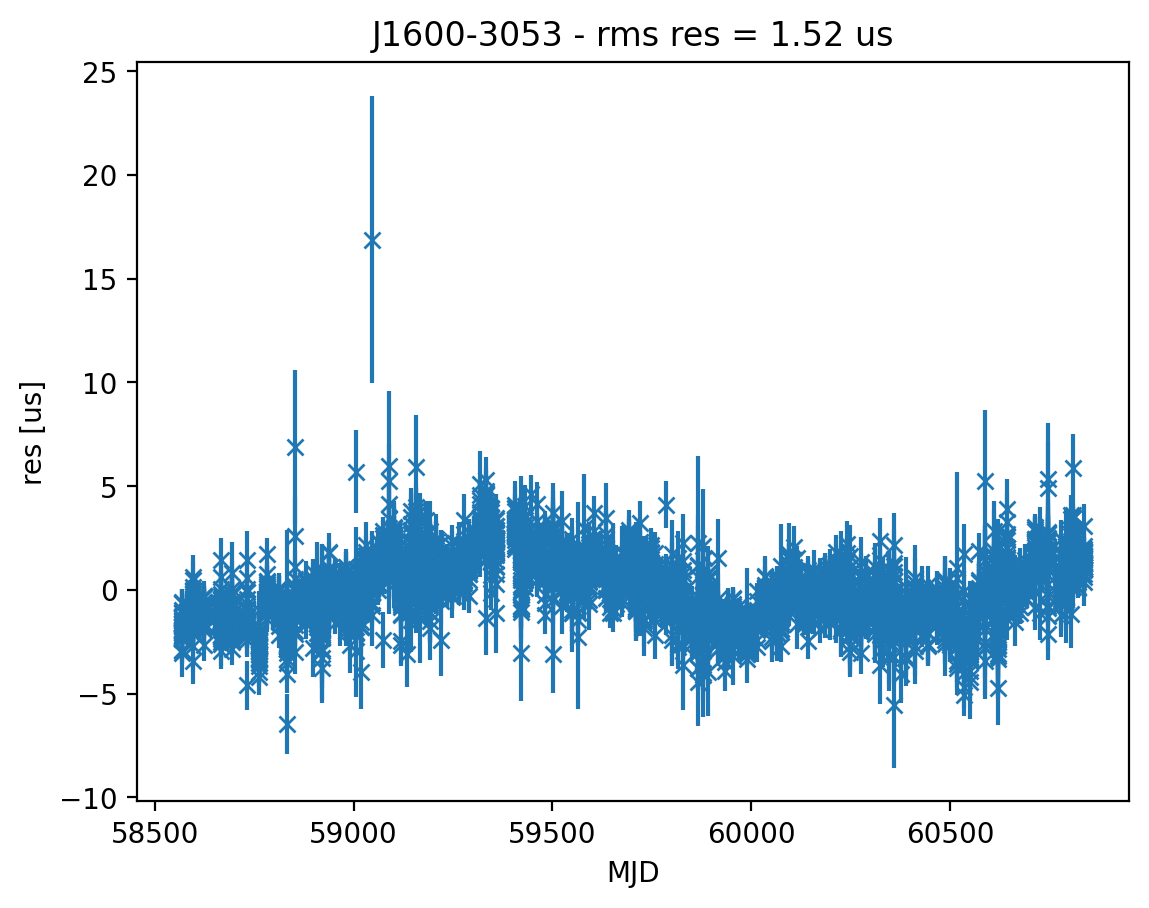

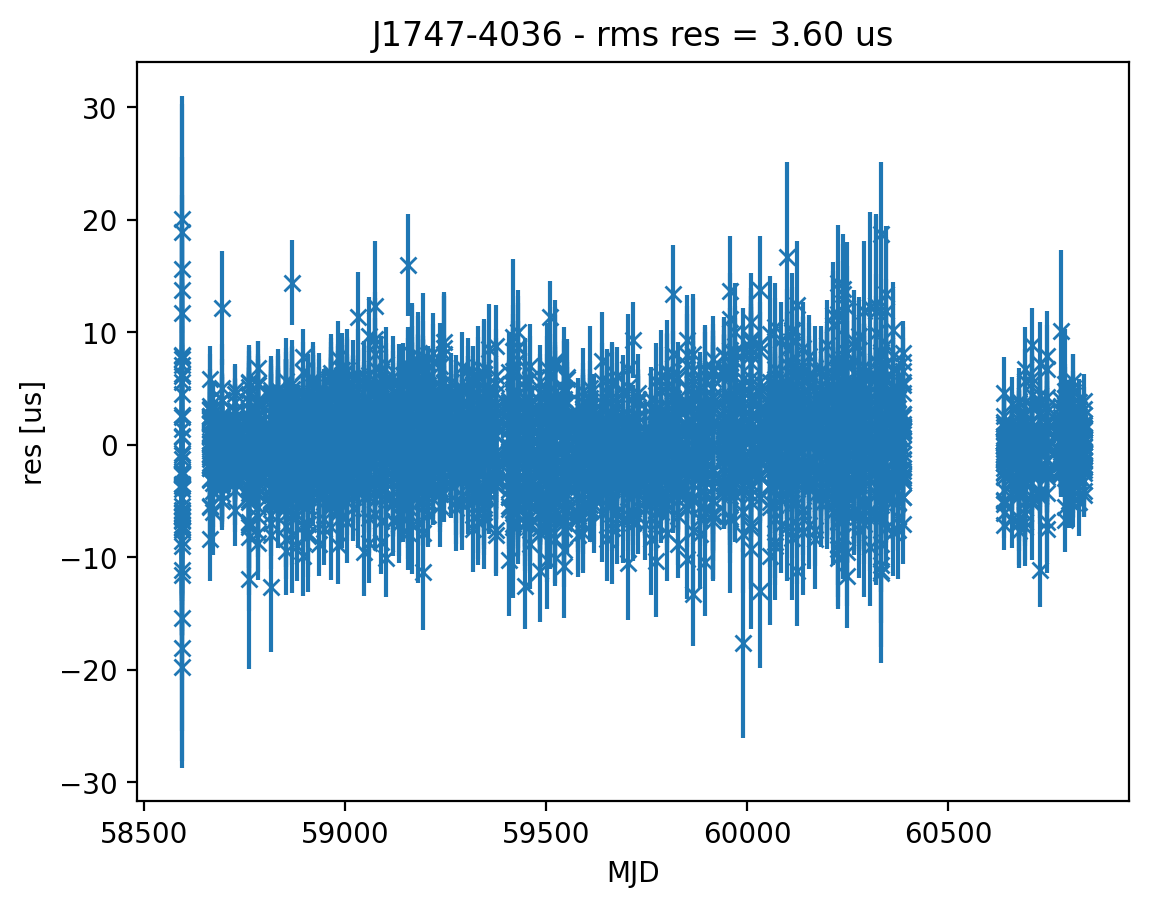

In [7]:
#plot residuals to check RN injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [8]:
# Add DM noise

psrs, dm_noise = add_dm(psrs,rand=True)
print("DM noise added")
print(dm_noise)

DM noise added
{'J1125-6014': {'dm_amp': 1.4773125449664283e-14, 'dm_gamma': 6.924500272988962}, 'J1737-0811': {'dm_amp': 7.221846400519201e-14, 'dm_gamma': 5.515510770601519}, 'J2229+2643': {'dm_amp': 6.113871898477151e-16, 'dm_gamma': 2.454457607010827}, 'J1101-6424': {'dm_amp': 2.696590263373617e-14, 'dm_gamma': 6.881516570540314}, 'J1421-4409': {'dm_amp': 4.0232497999893675e-14, 'dm_gamma': 5.260359551557261}, 'J1036-8317': {'dm_amp': 9.484245091888012e-14, 'dm_gamma': 2.8974682960875615}, 'J2124-3358': {'dm_amp': 3.830222141897303e-14, 'dm_gamma': 6.749943684078852}, 'J1744-1134': {'dm_amp': 3.325709594850044e-14, 'dm_gamma': 5.4565092247269575}, 'J1600-3053': {'dm_amp': 9.85865803930533e-15, 'dm_gamma': 6.807450348733981}, 'J1747-4036': {'dm_amp': 3.871576938457005e-14, 'dm_gamma': 3.187975901319253}}


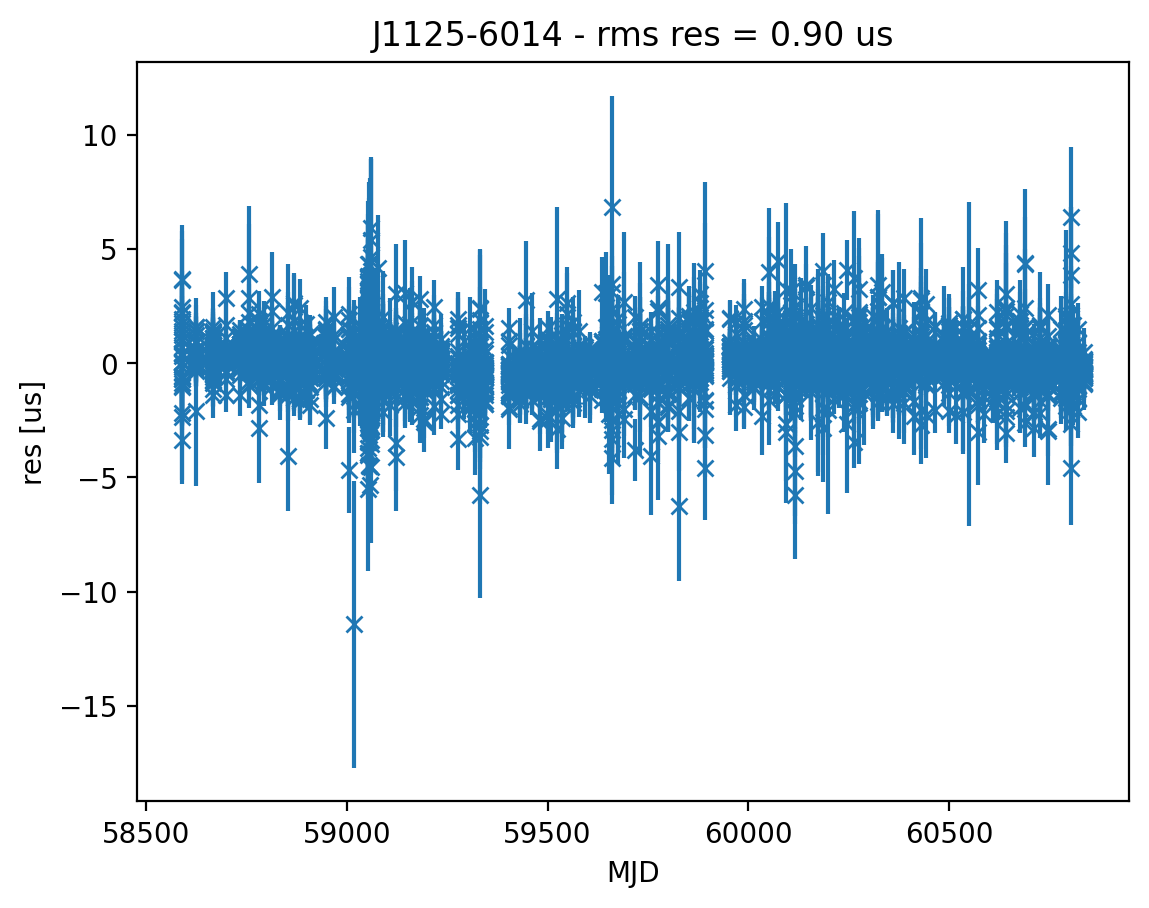

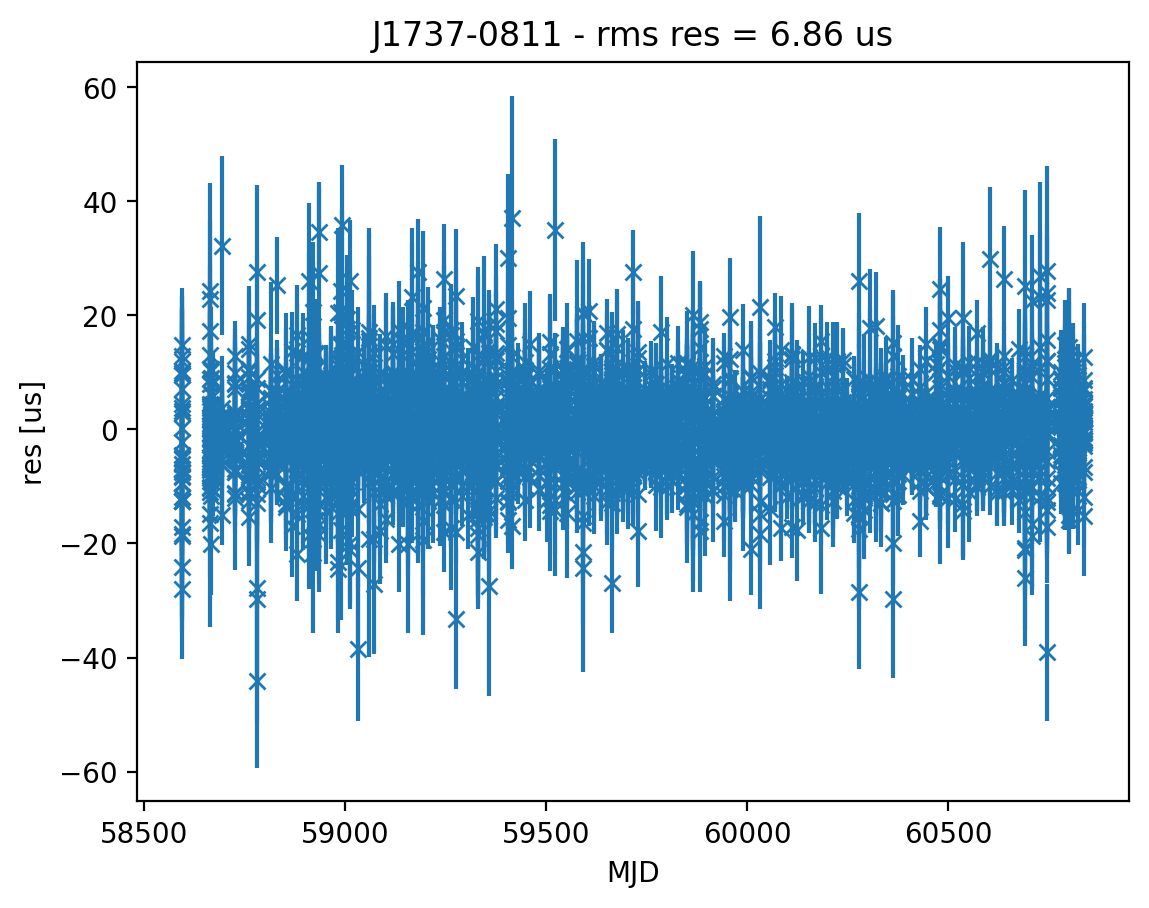

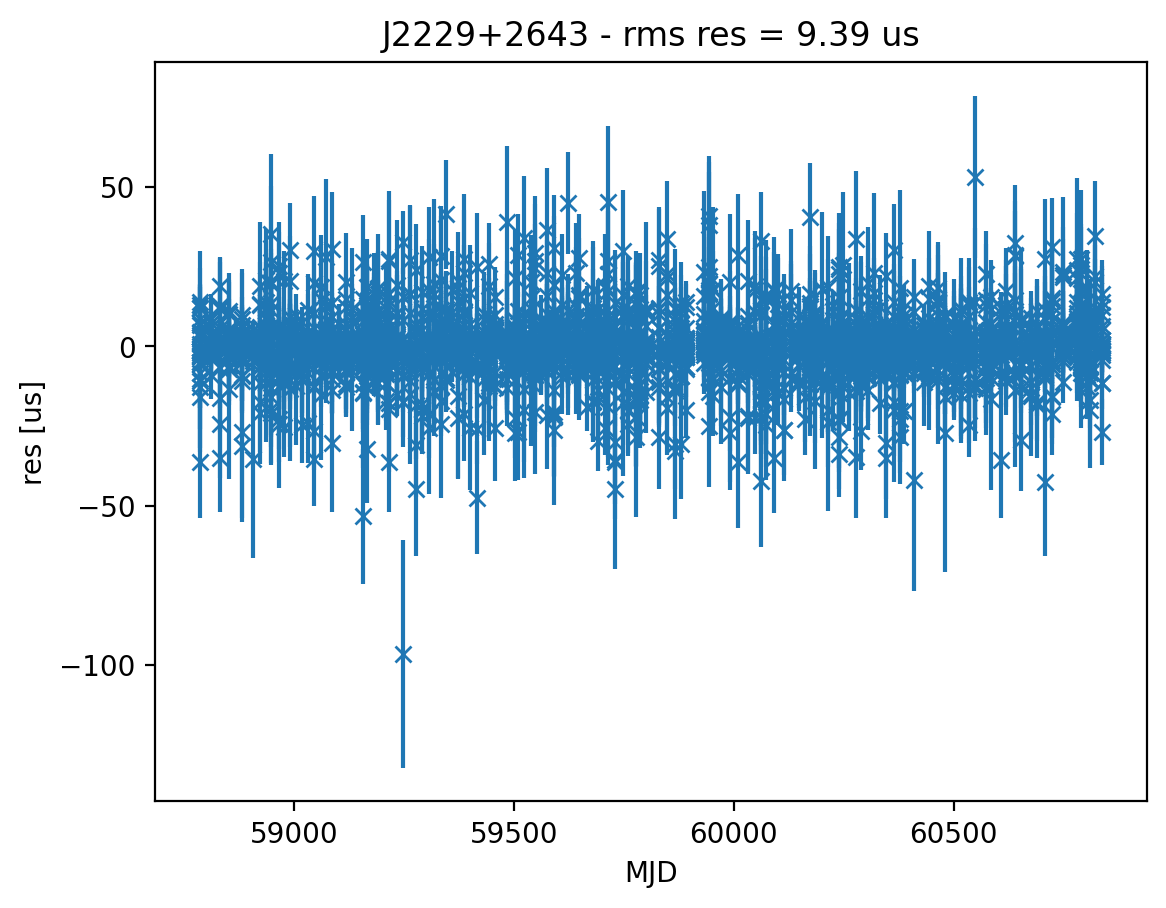

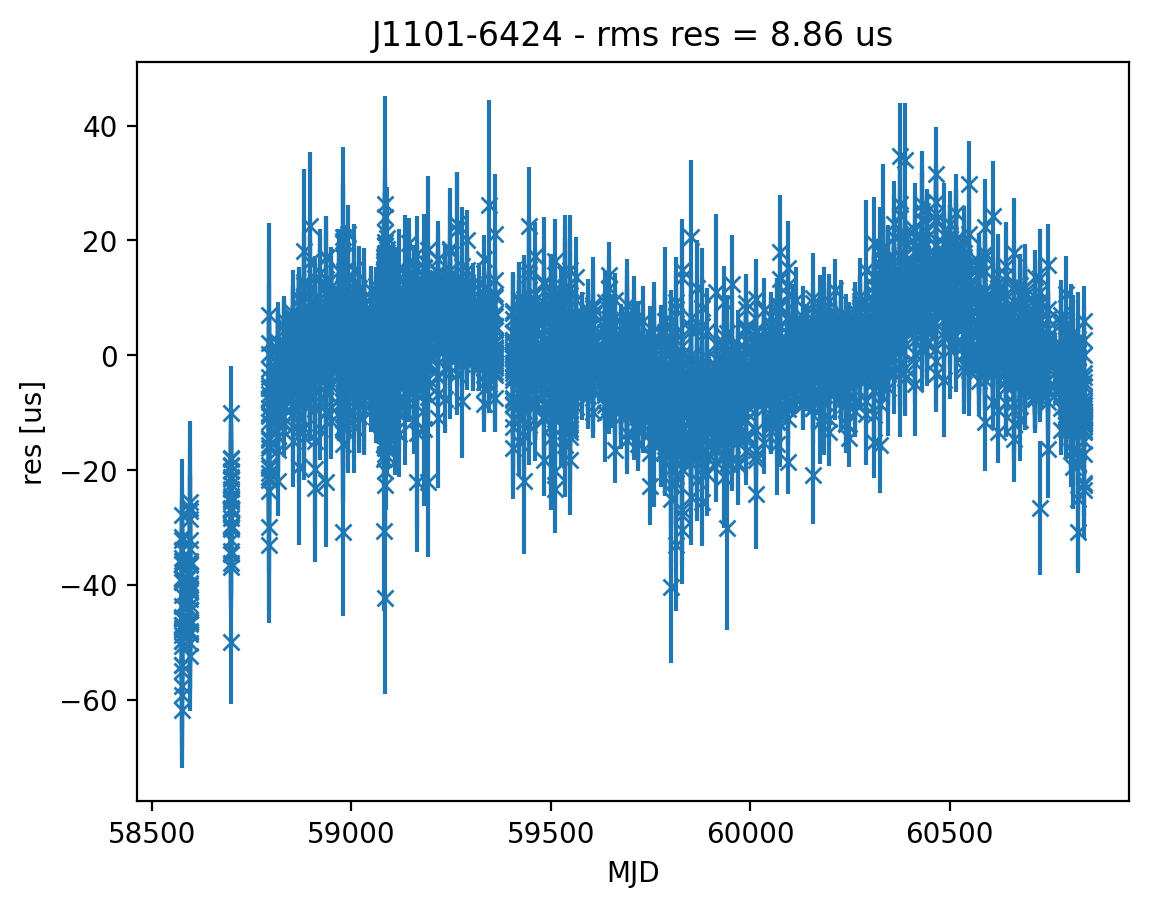

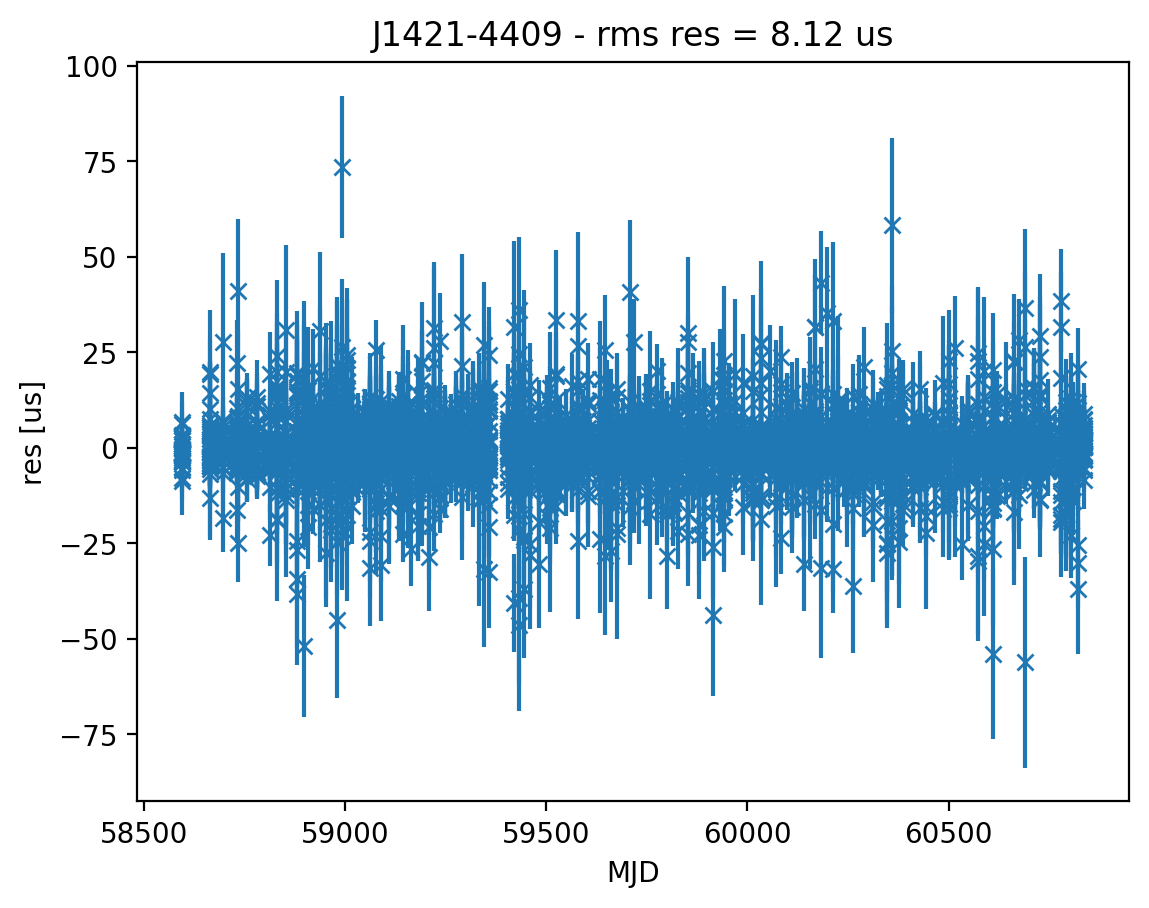

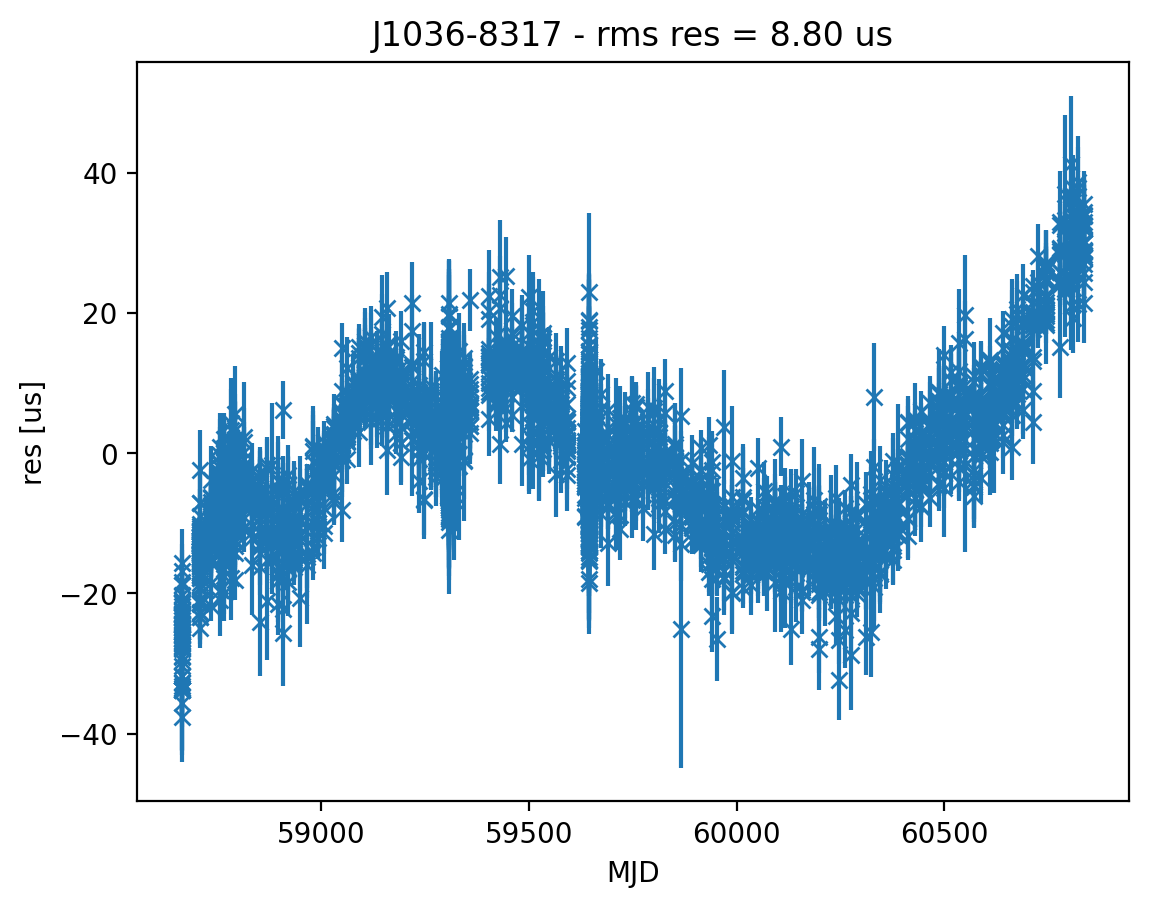

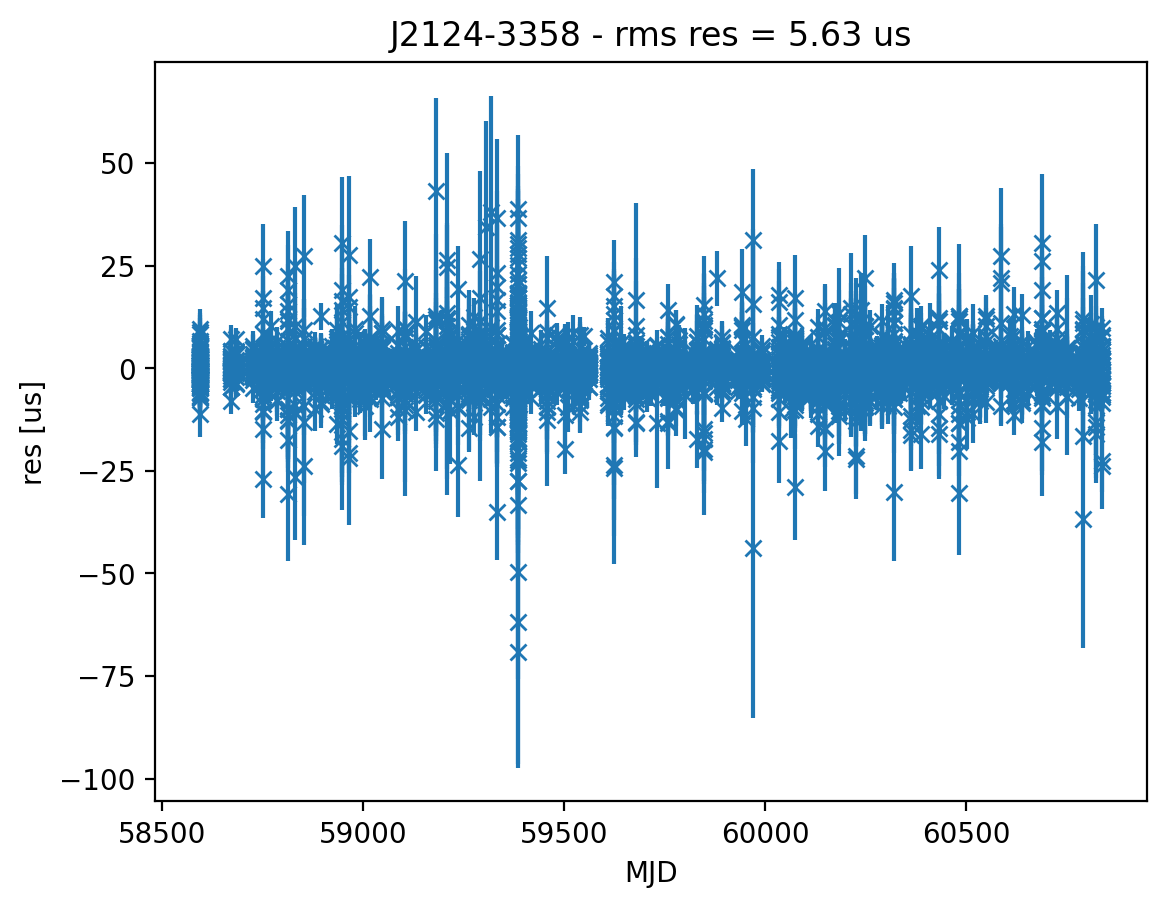

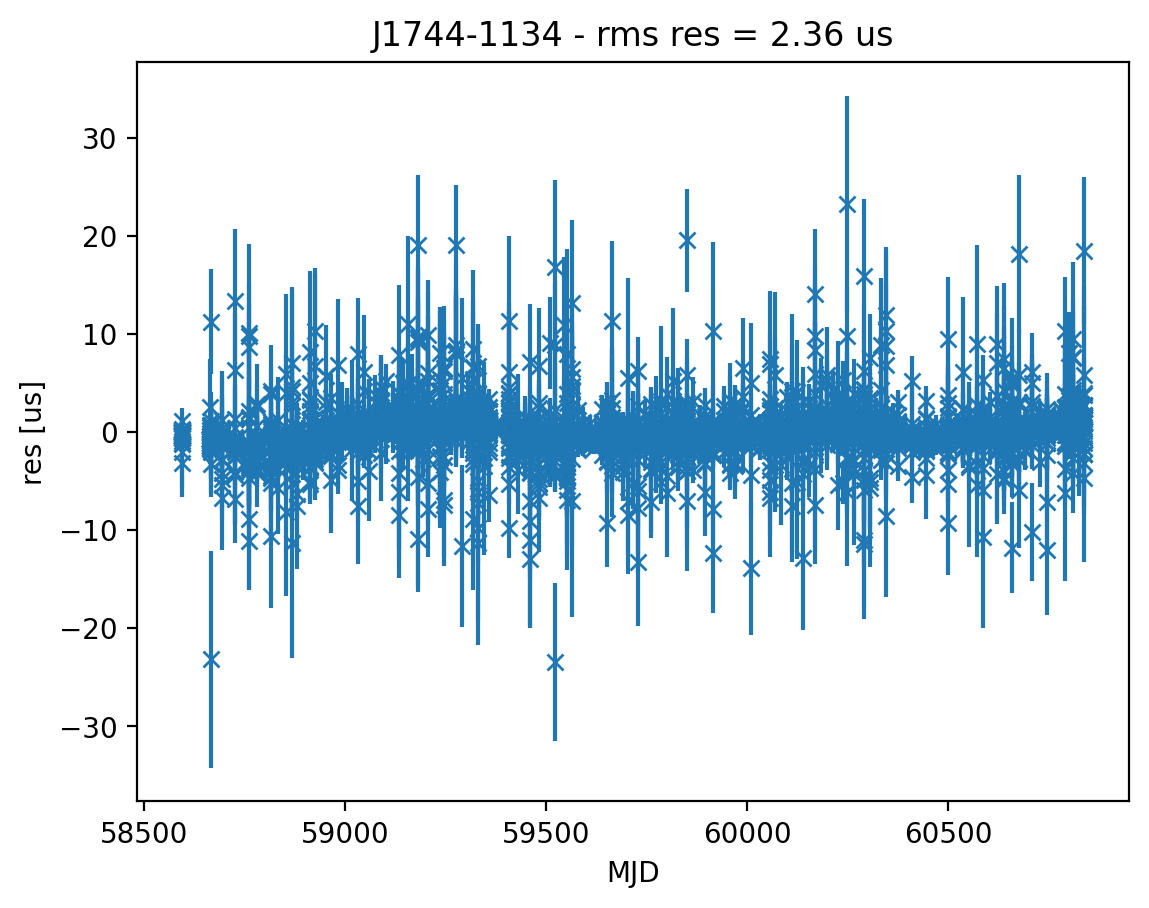

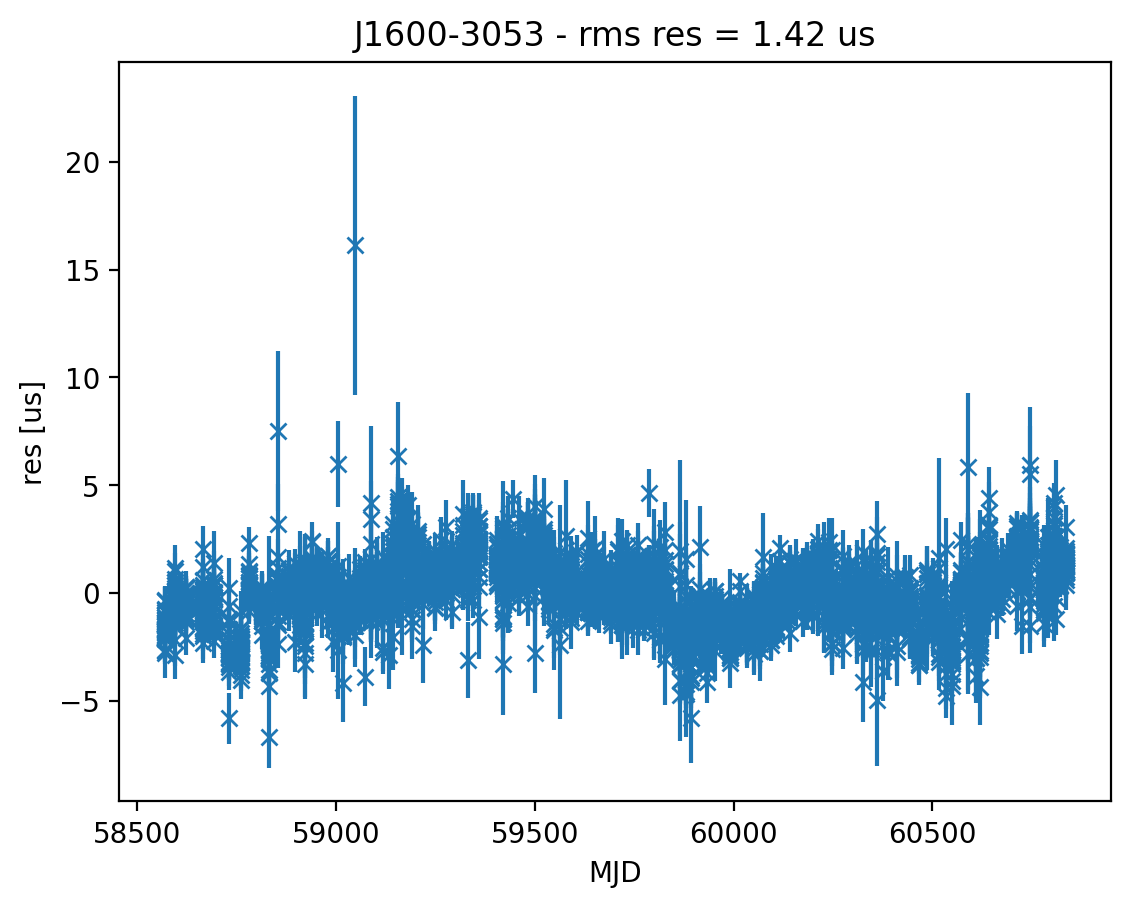

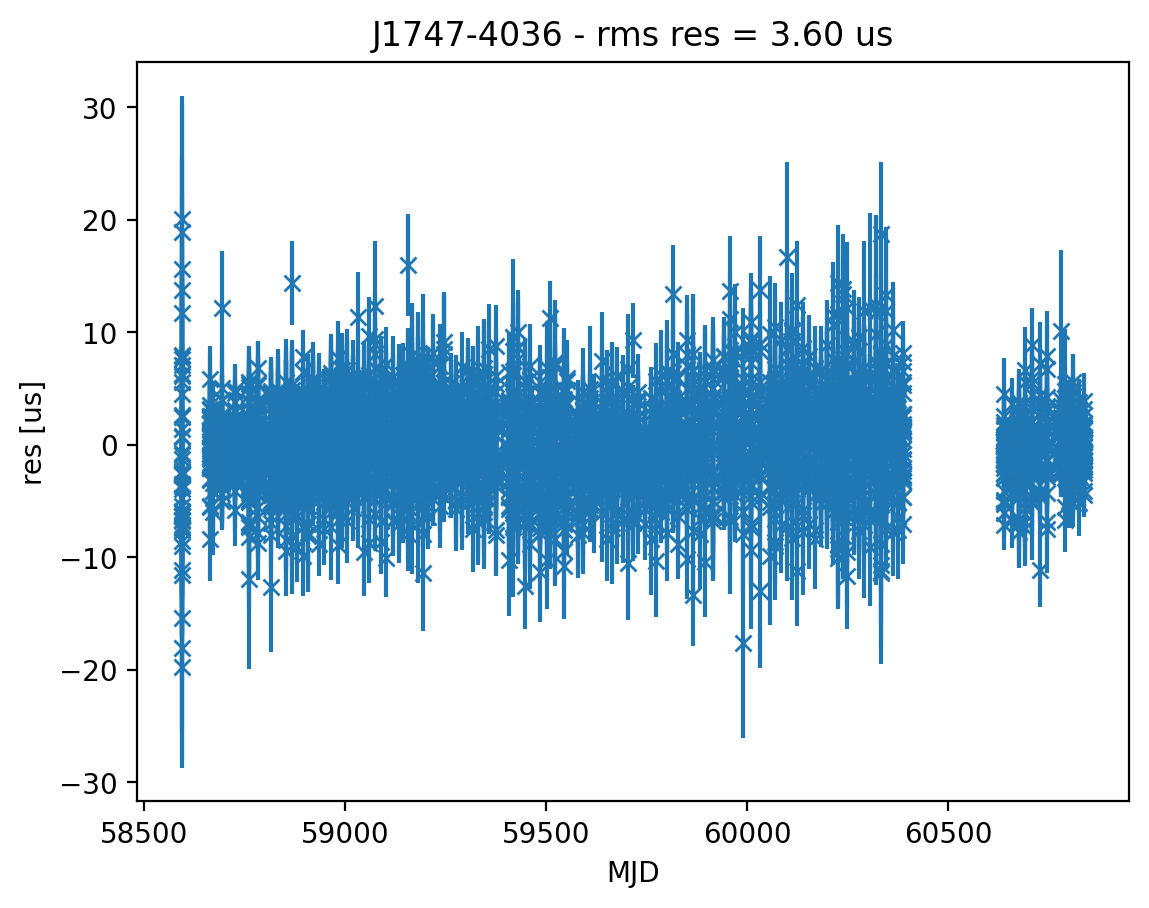

In [9]:
#plot residuals to check DM injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [10]:
# Add scattering noise

psrs, chrom_noise = add_scattering(psrs,rand=True)
print("Chromatic noise added")
print(chrom_noise)

Chromatic noise added
{'J1125-6014': {'chrom_amp': 2.312188399940239e-14, 'chrom_gamma': 5.567242493689839, 'chrom_idx': 3.7058677235808}, 'J1737-0811': {'chrom_amp': 6.345034794081583e-14, 'chrom_gamma': 3.781965882065148, 'chrom_idx': 3.1508505057696494}, 'J2229+2643': {'chrom_amp': 6.86821394742766e-14, 'chrom_gamma': 5.744892453202028, 'chrom_idx': 4.410253309354138}, 'J1101-6424': {'chrom_amp': 2.0108372084969832e-14, 'chrom_gamma': 1.2451424664857476, 'chrom_idx': 4.253080465085302}, 'J1421-4409': {'chrom_amp': 6.673771209260276e-15, 'chrom_gamma': 2.1744766532670057, 'chrom_idx': 3.266626591986534}, 'J1036-8317': {'chrom_amp': 6.837634221992504e-15, 'chrom_gamma': 6.519454792011544, 'chrom_idx': 3.5731916235294623}, 'J2124-3358': {'chrom_amp': 4.2966276595097167e-14, 'chrom_gamma': 6.7885001161812575, 'chrom_idx': 3.0870894720936977}, 'J1744-1134': {'chrom_amp': 7.881945989422806e-14, 'chrom_gamma': 4.4661124433914665, 'chrom_idx': 4.939183808962075}, 'J1600-3053': {'chrom_amp':

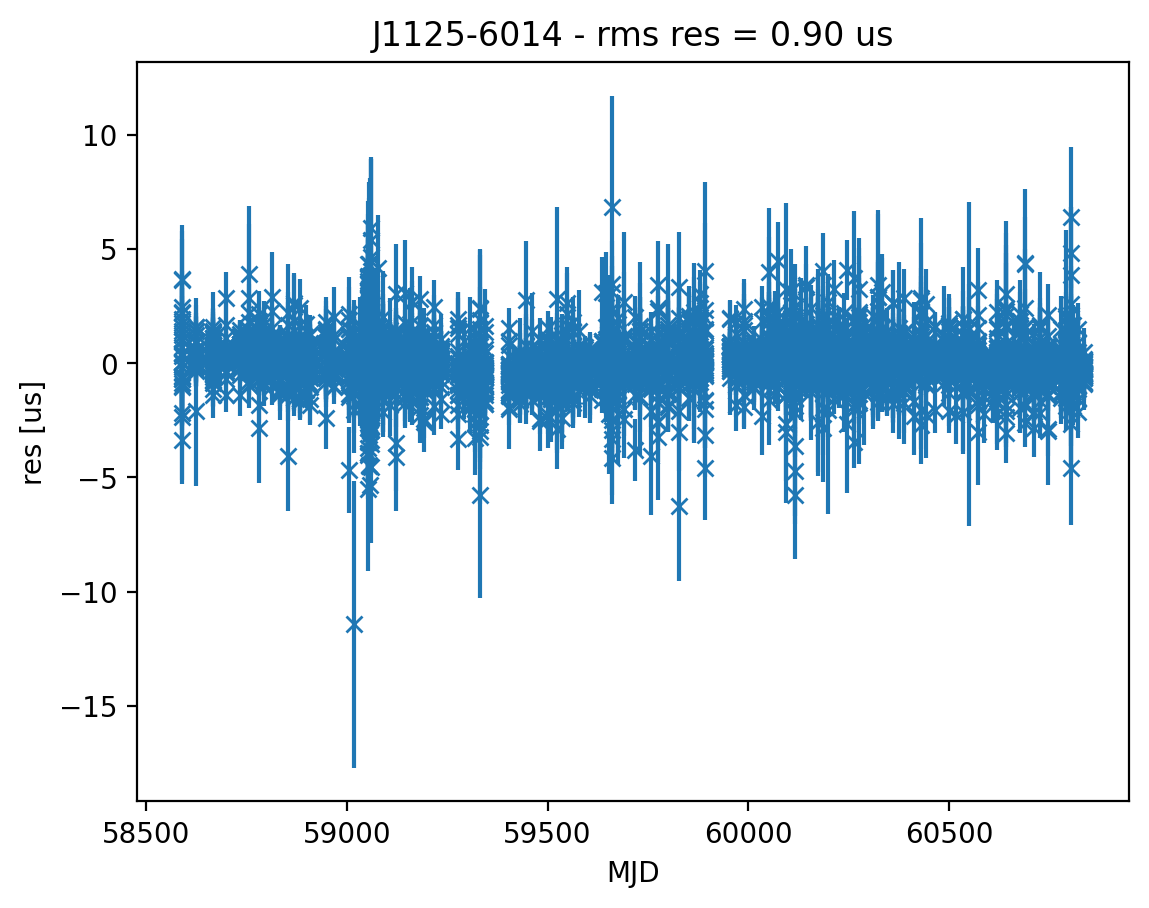

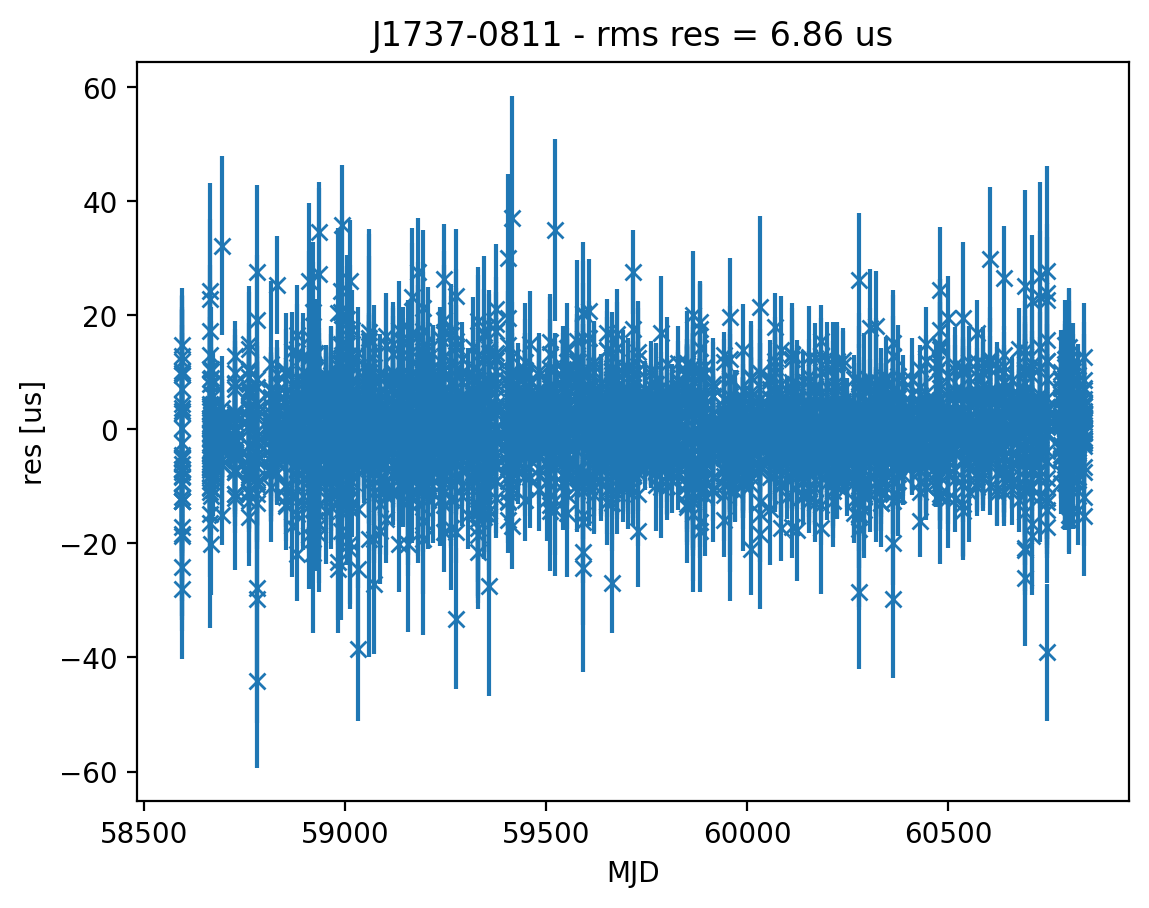

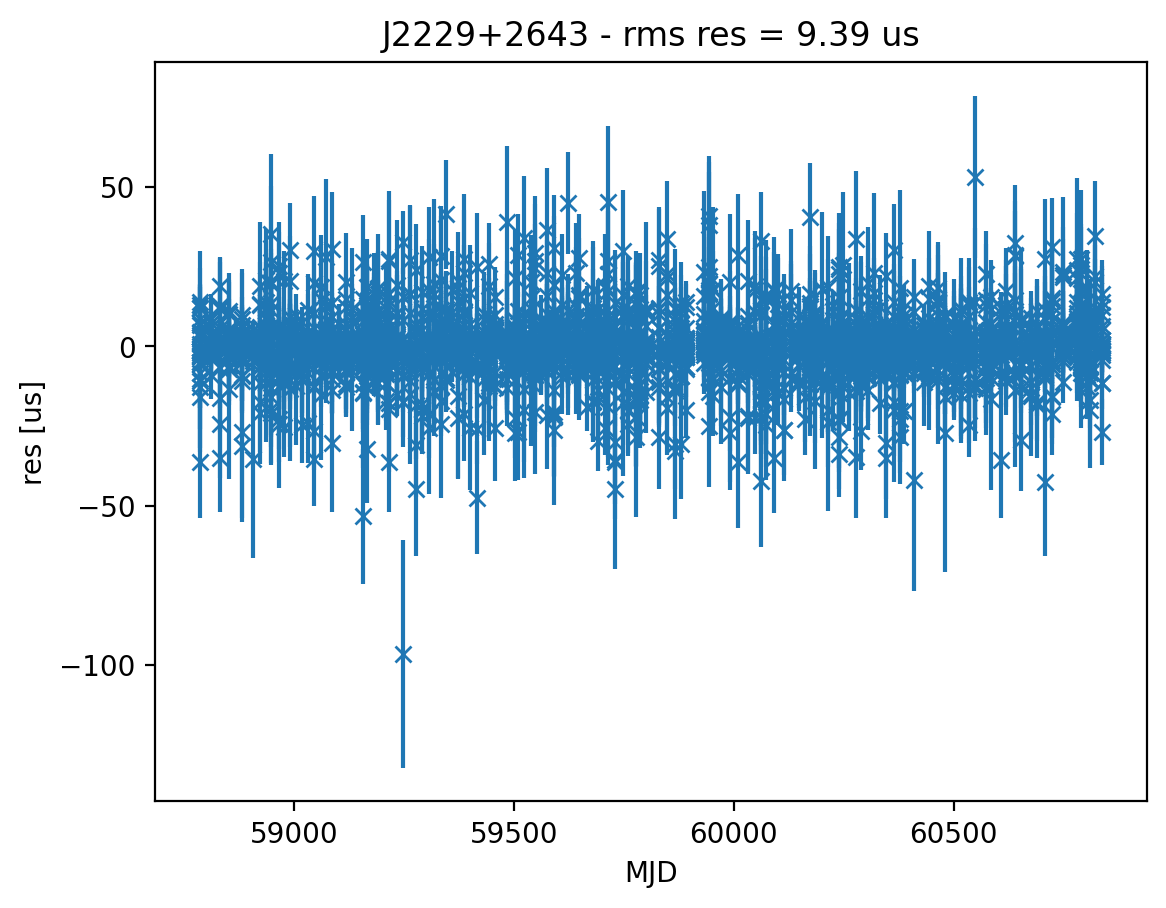

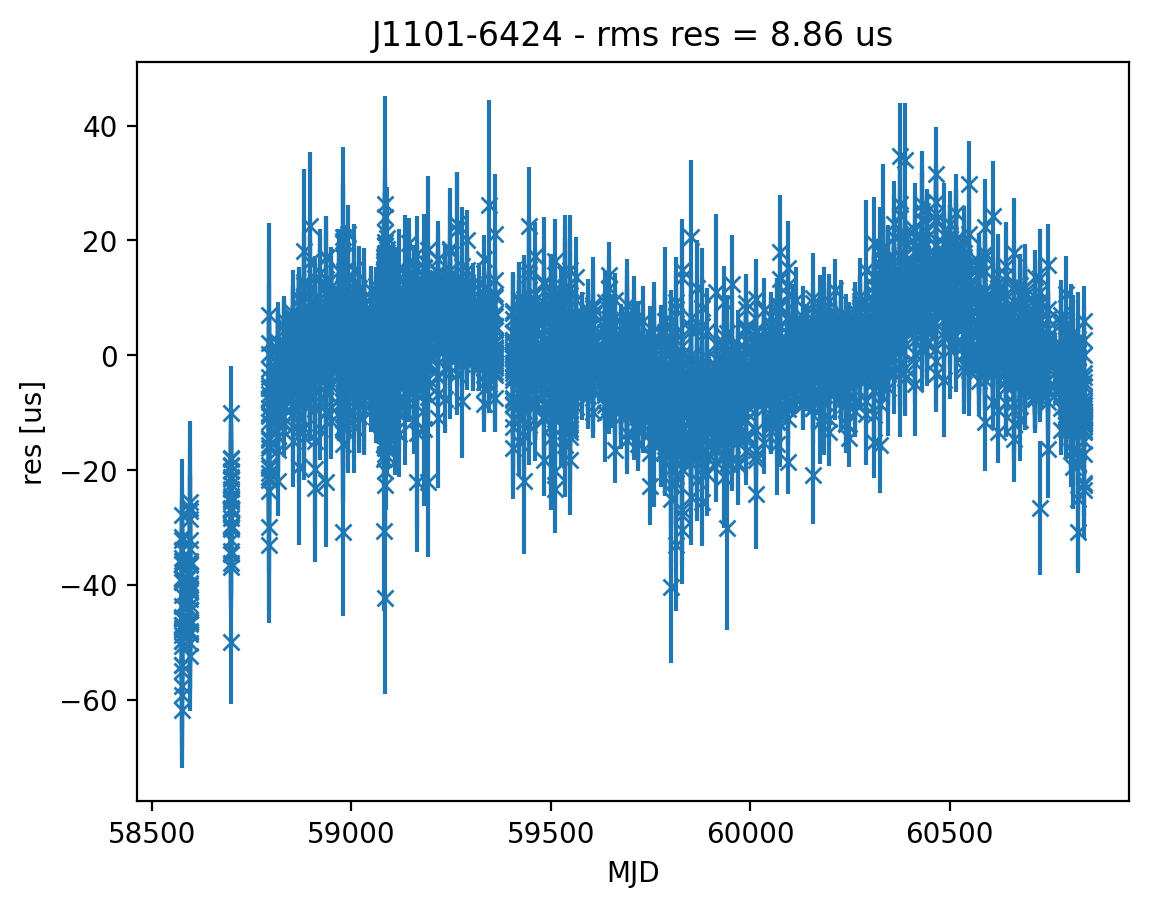

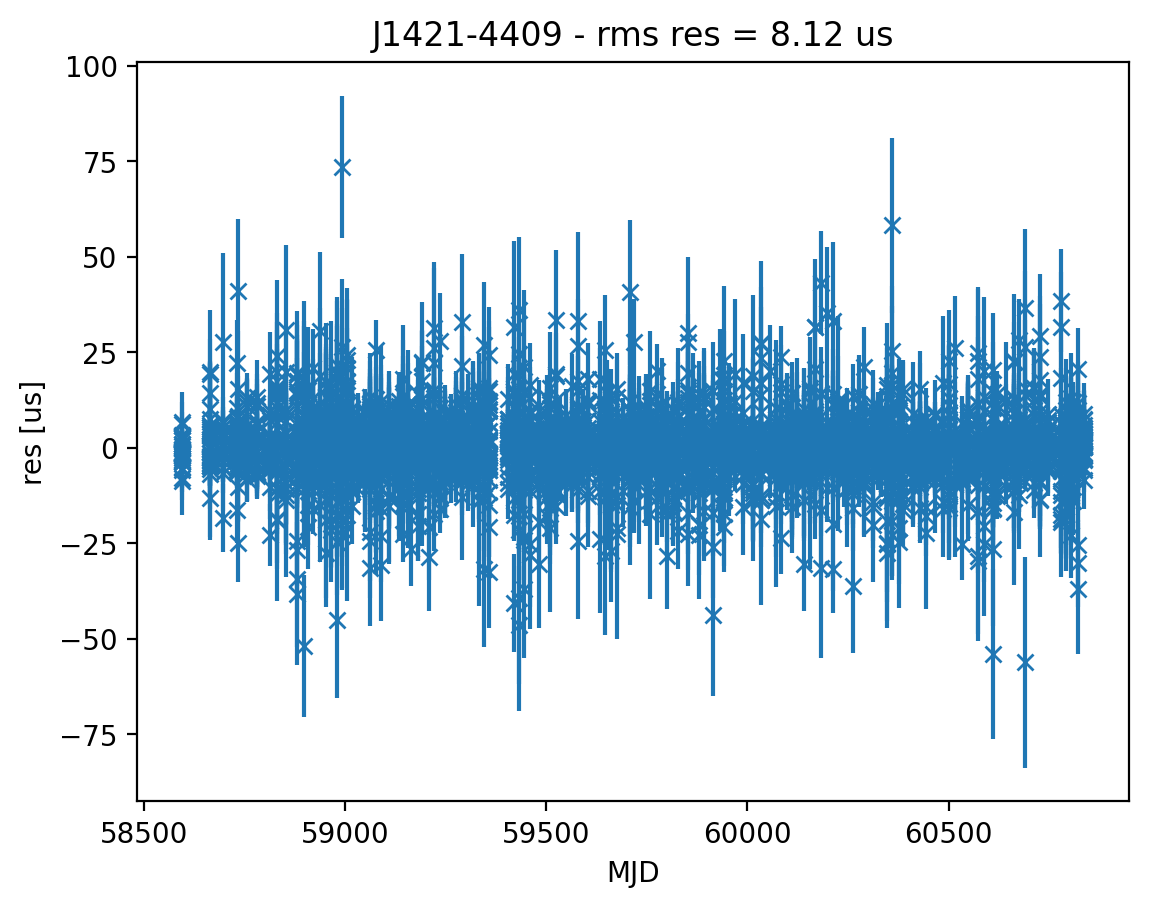

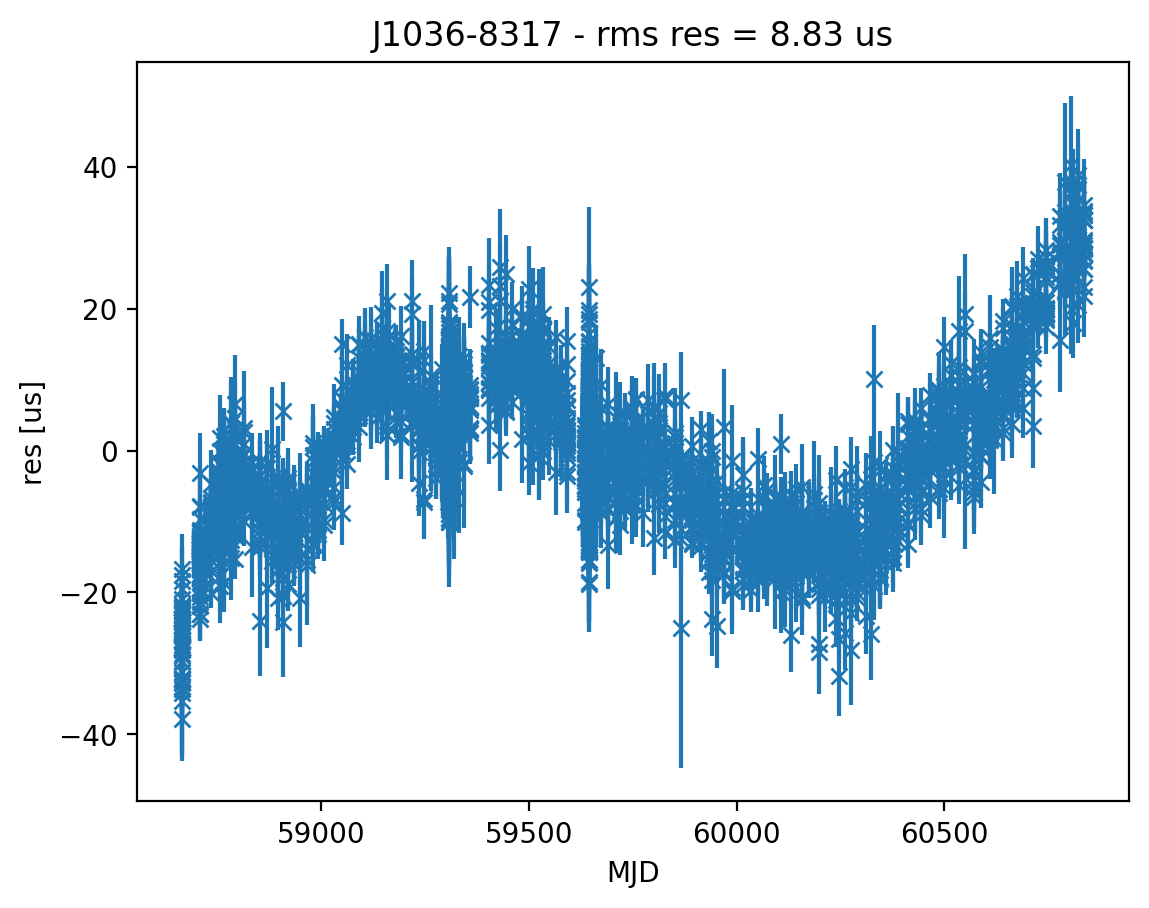

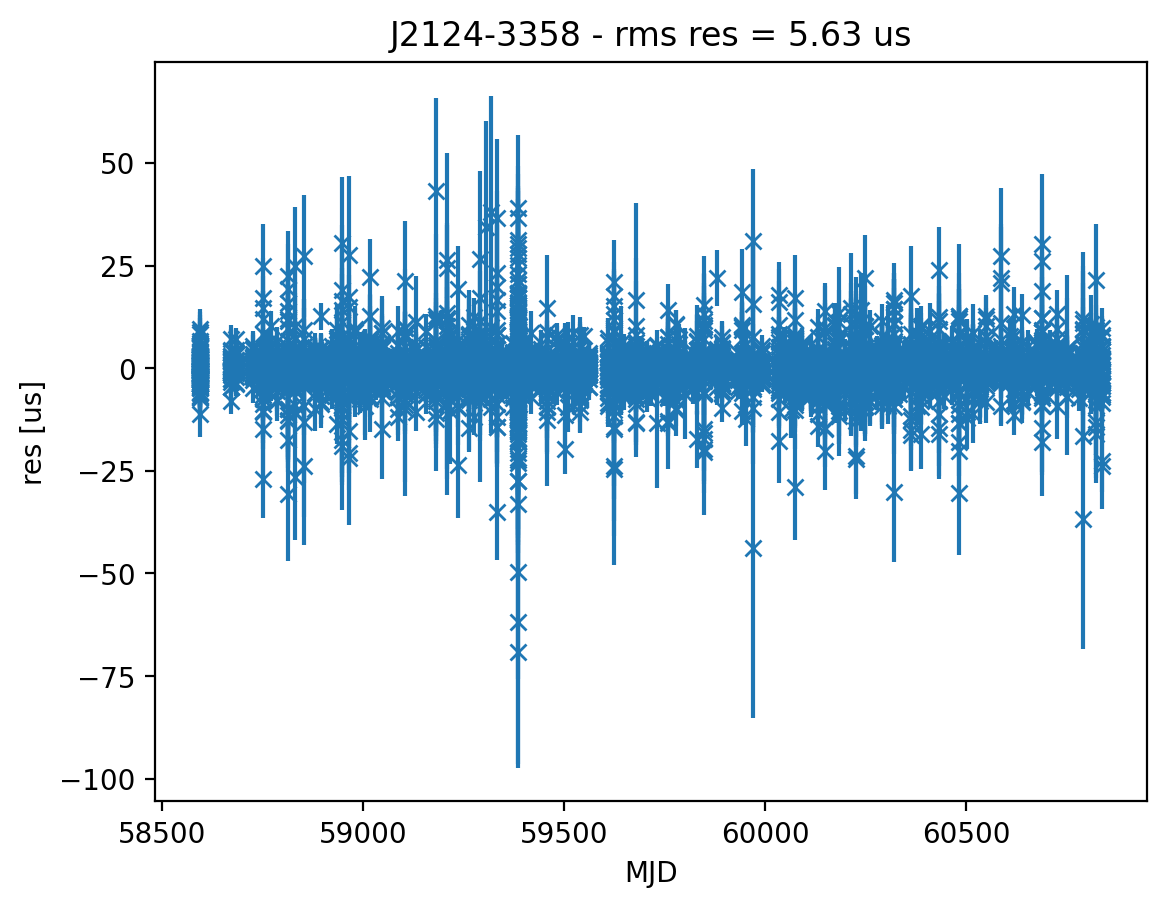

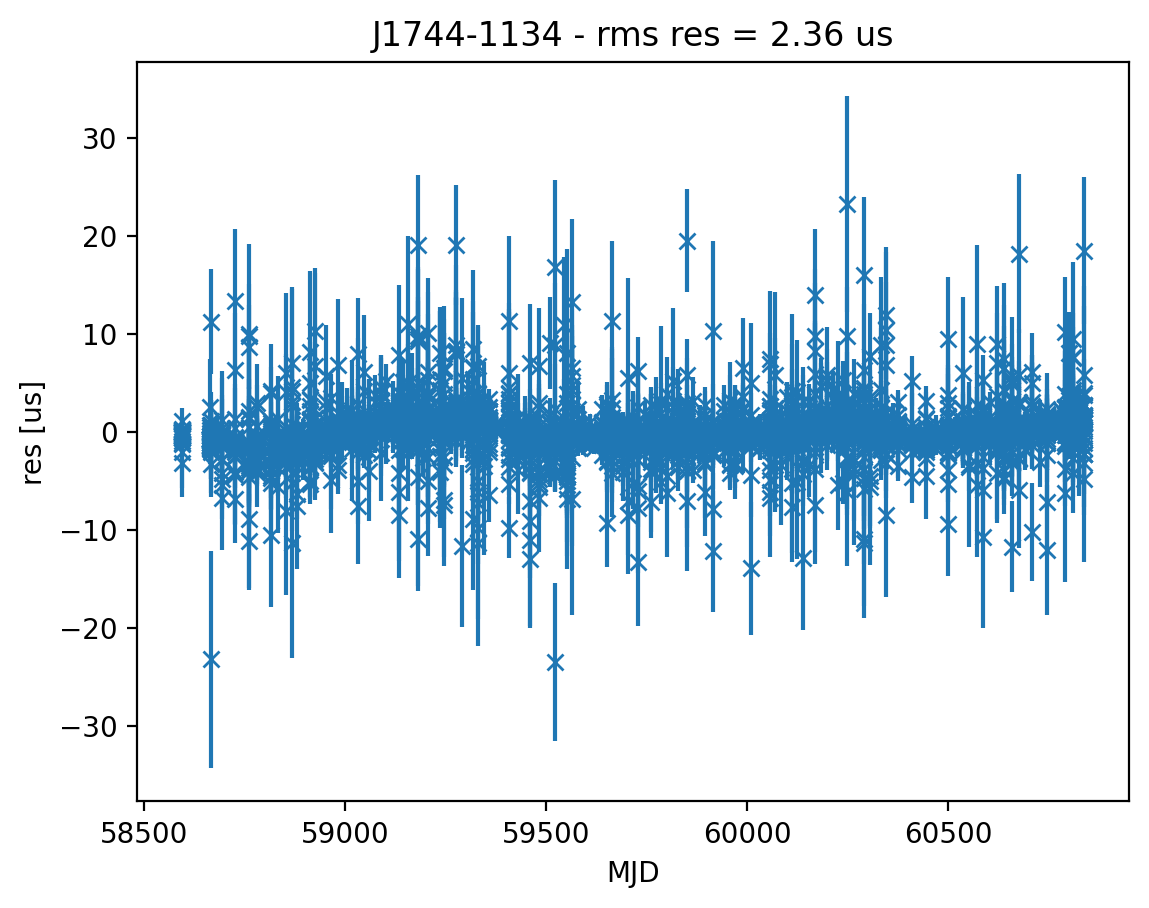

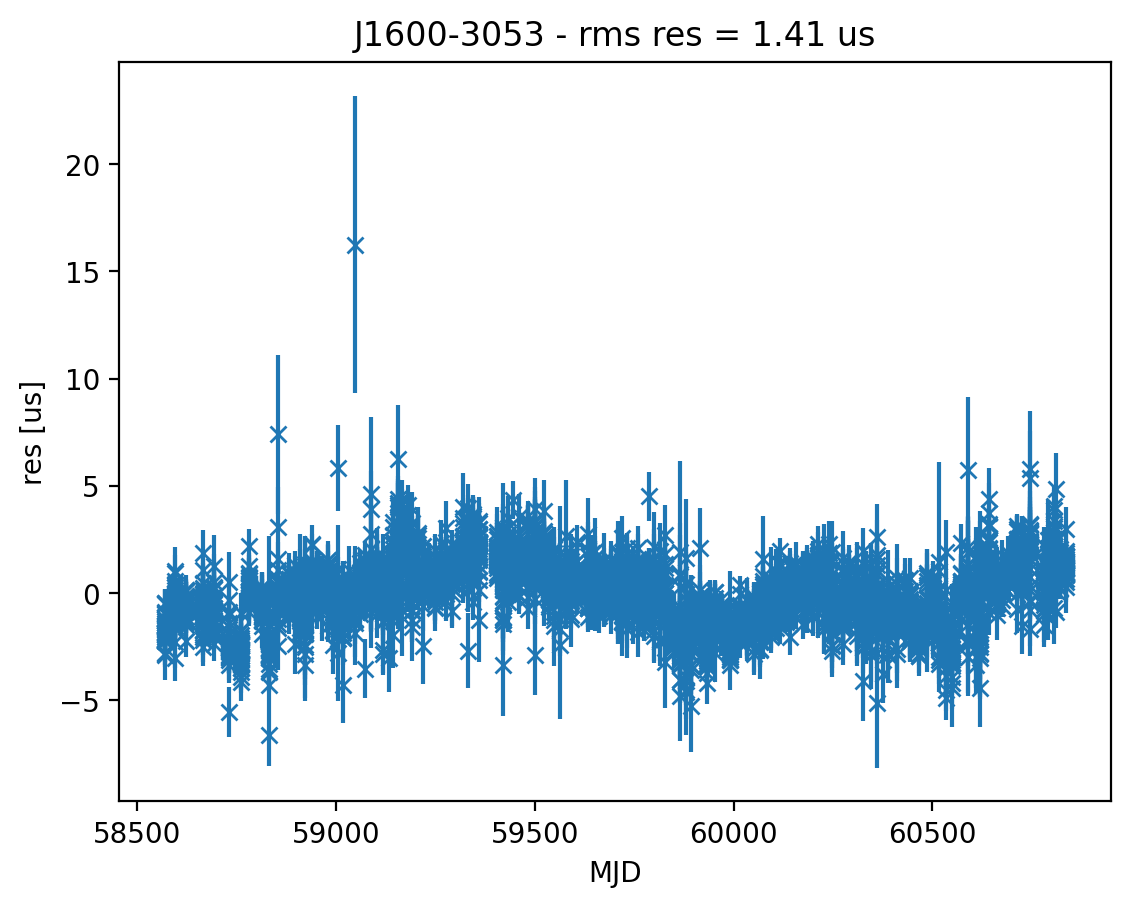

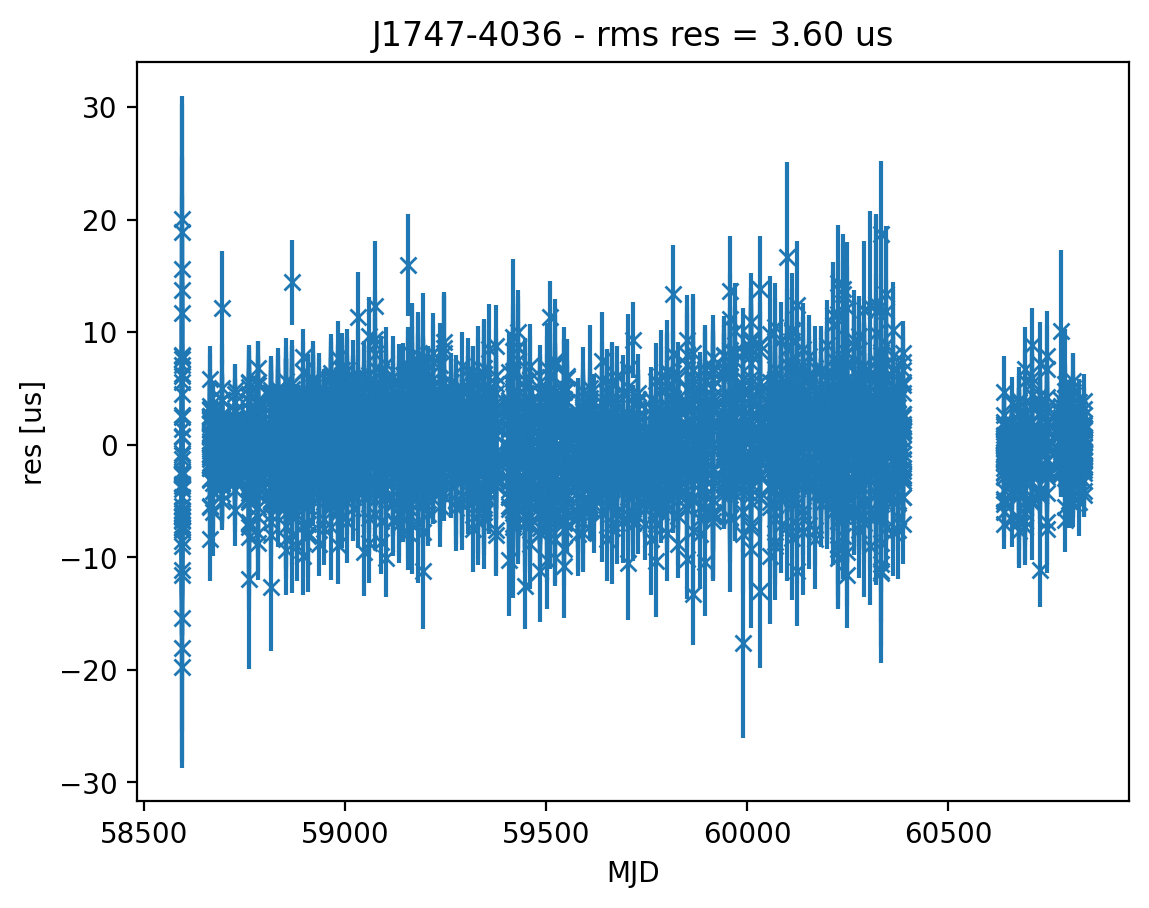

In [11]:
#plot residuals to check scattering noise injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [12]:
# Inject a GWB
add_gwb(psrs)
print("GWB added")


GWB added


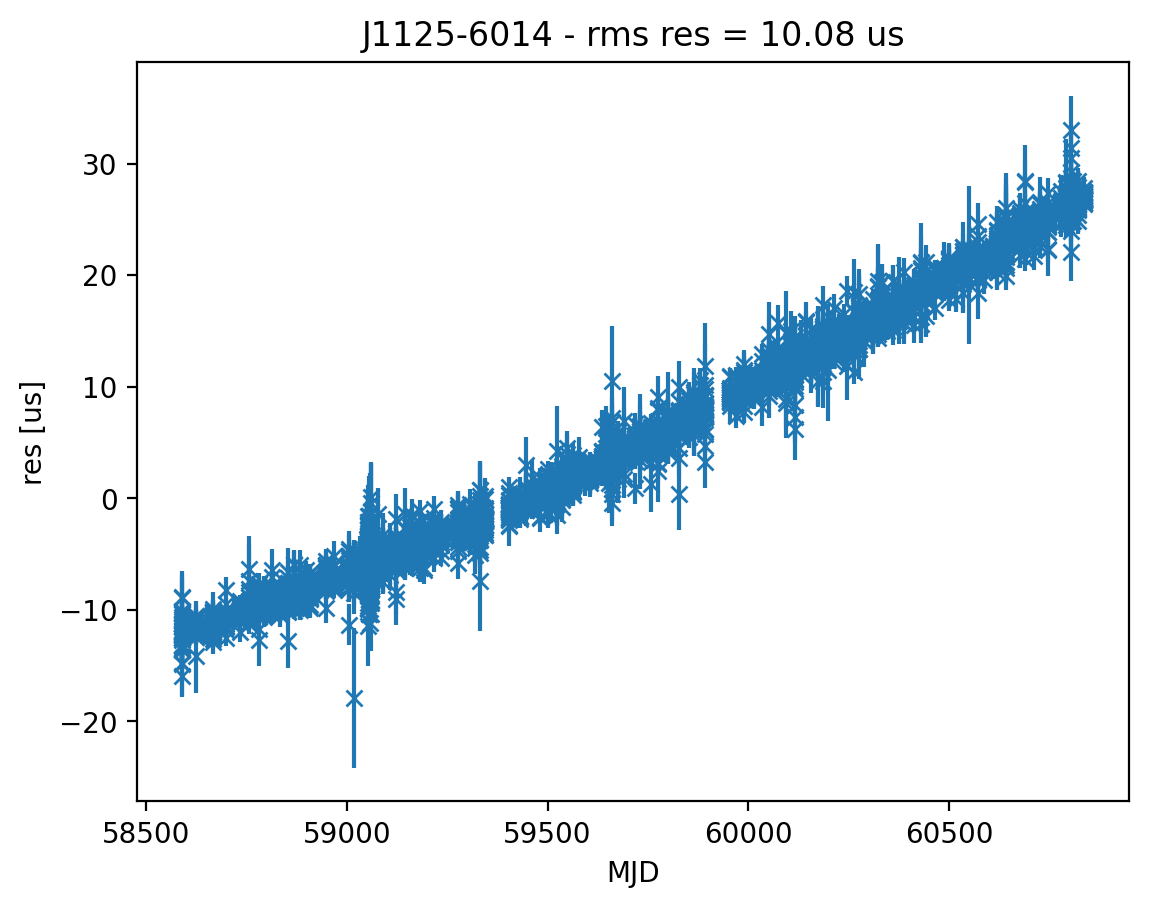

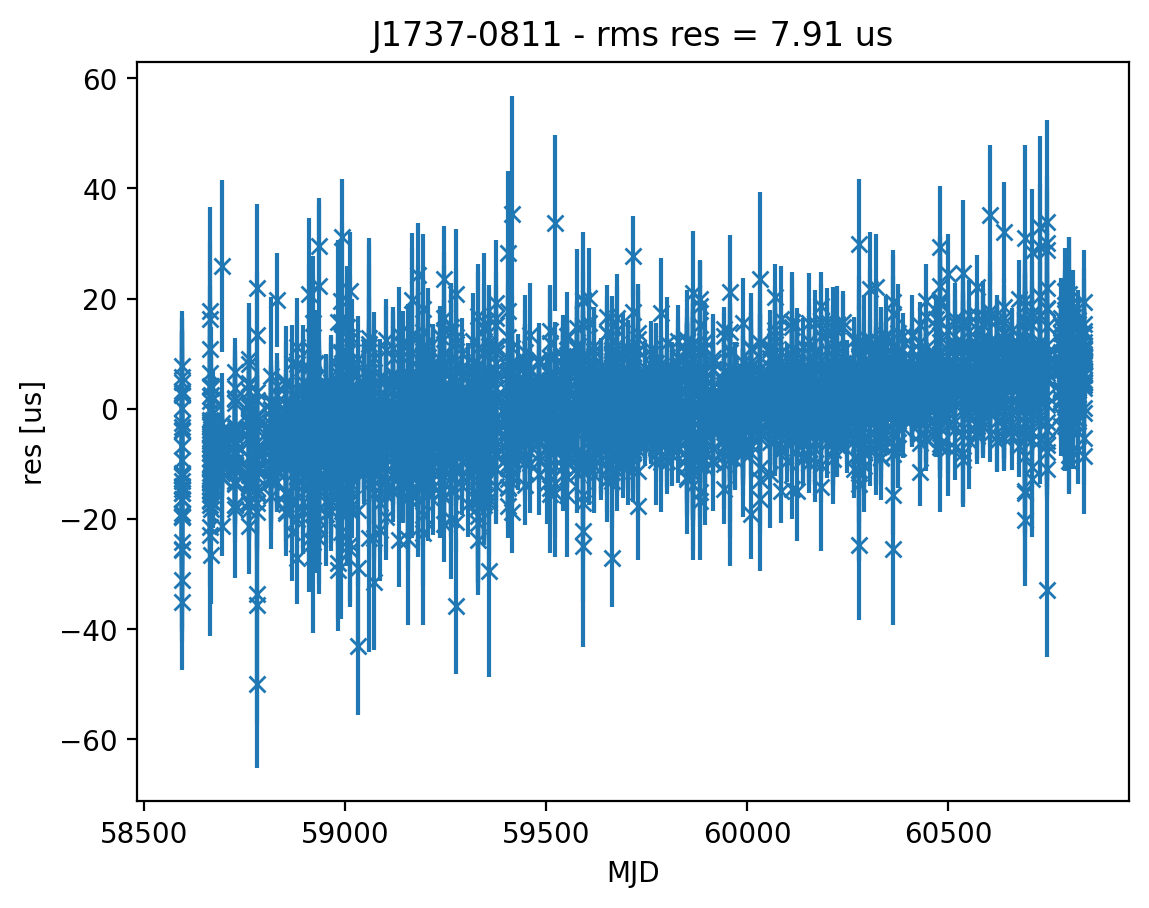

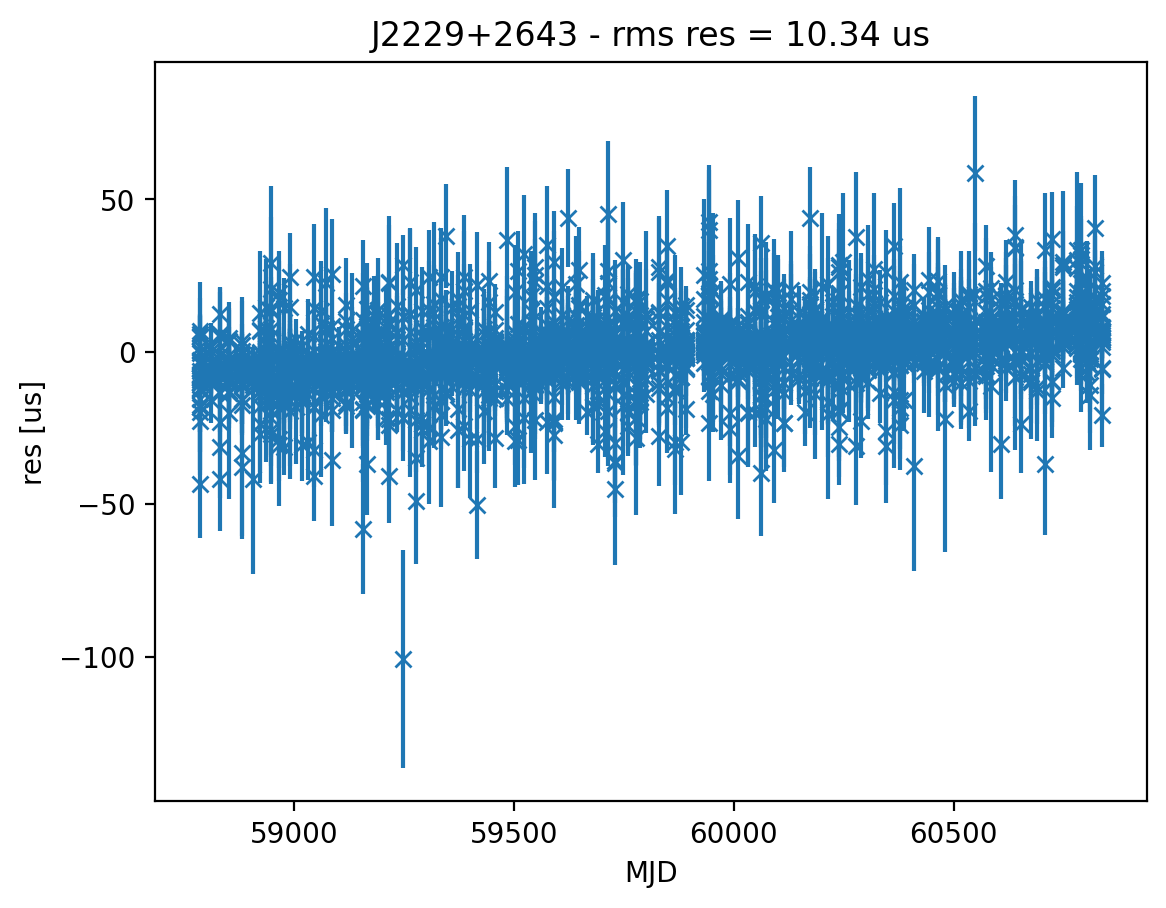

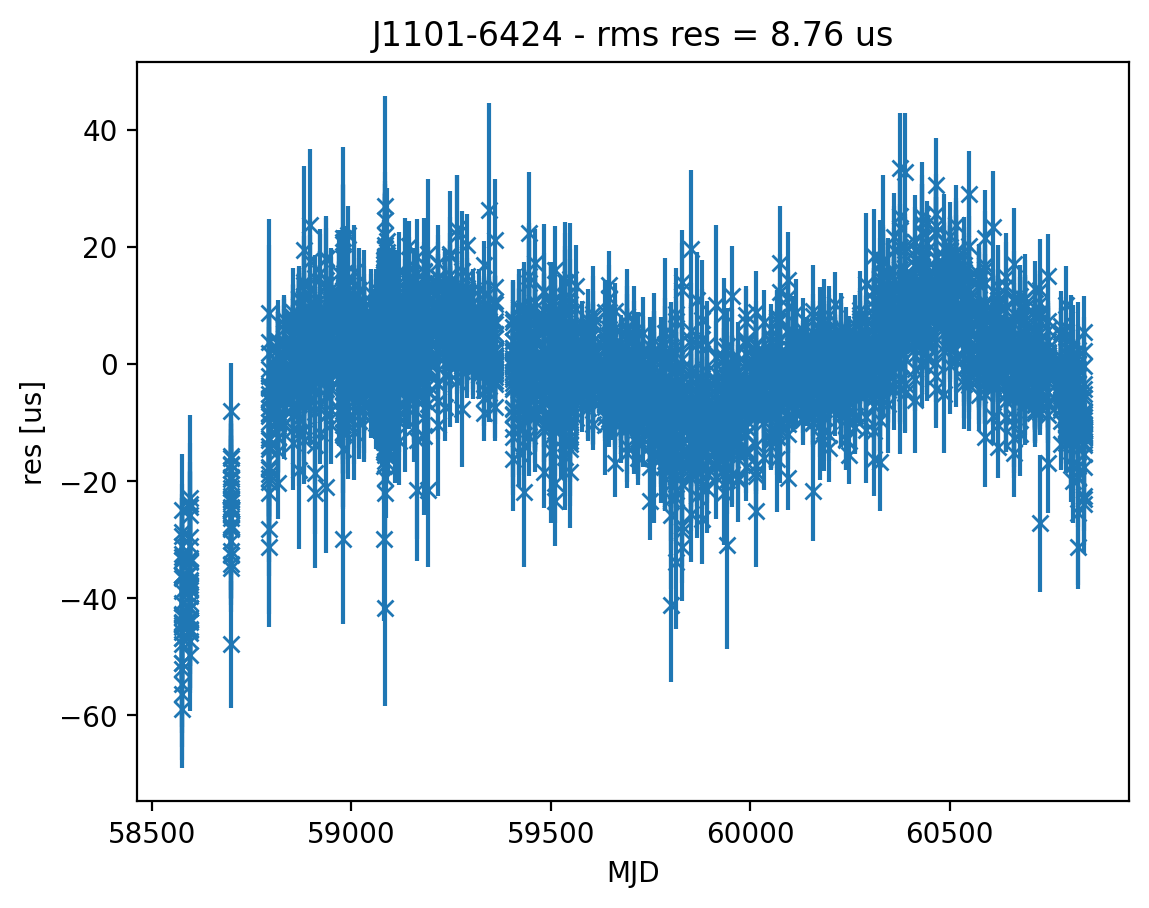

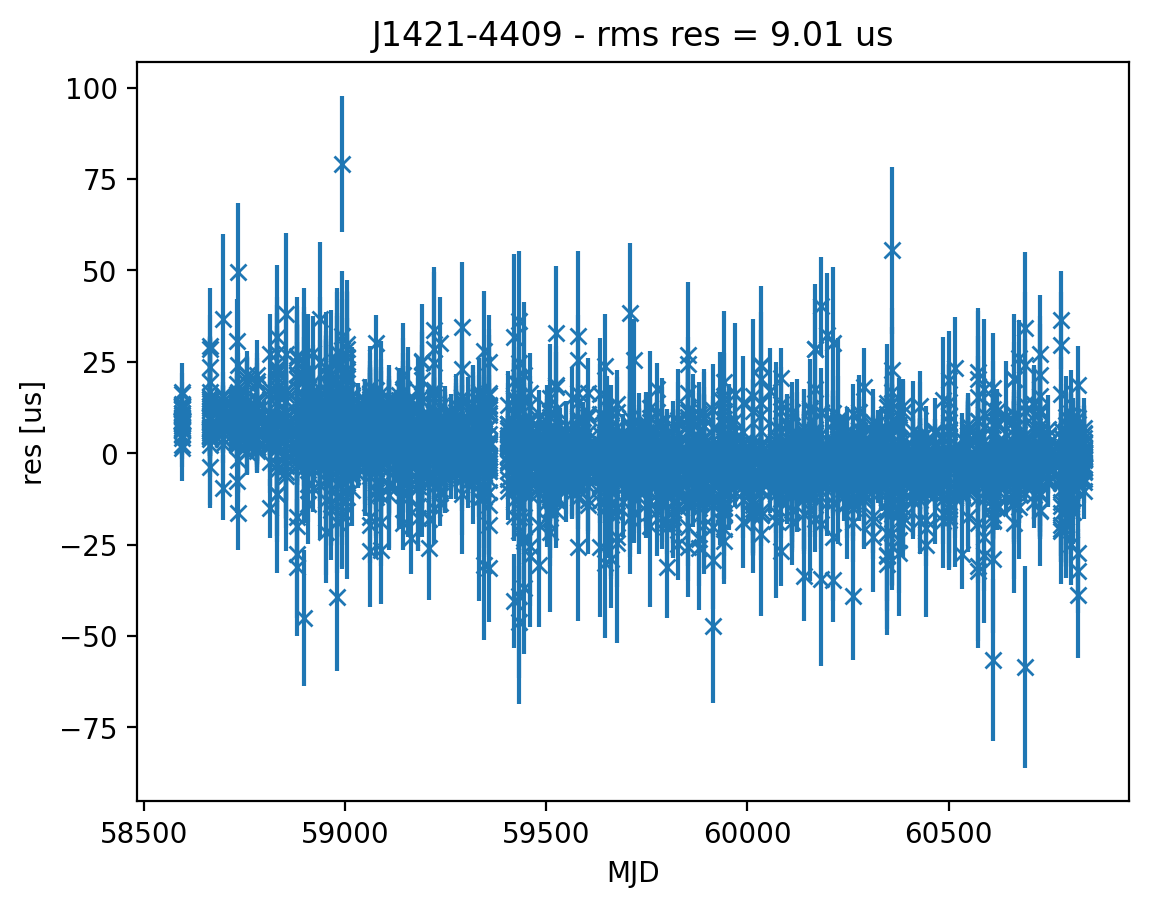

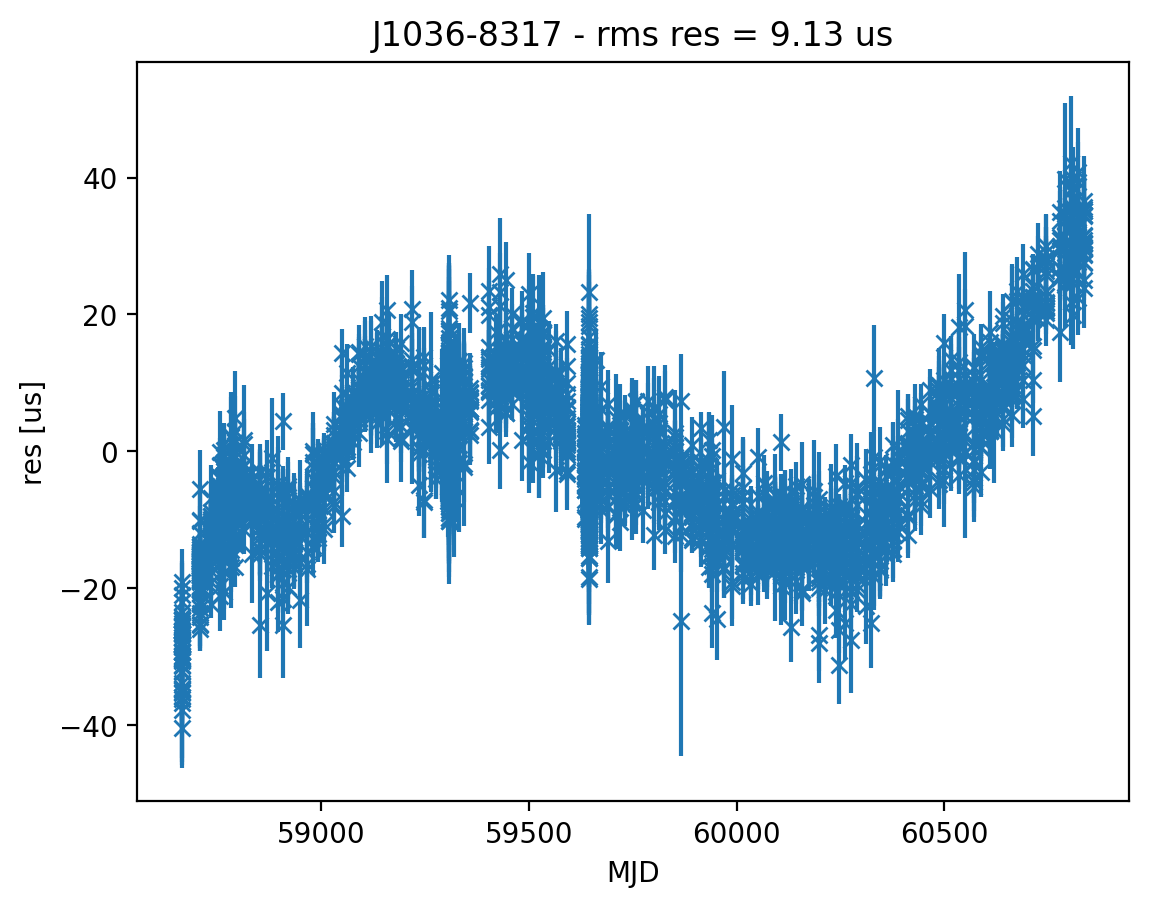

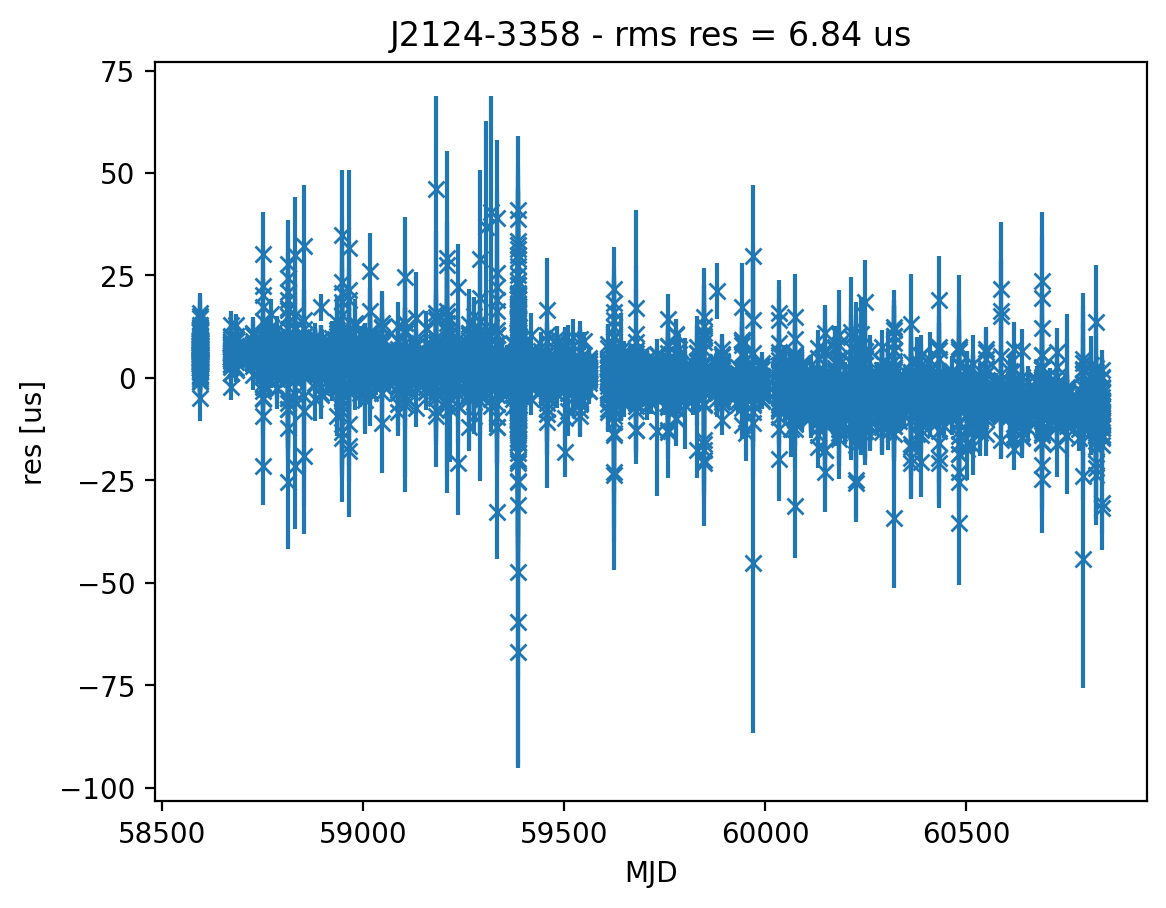

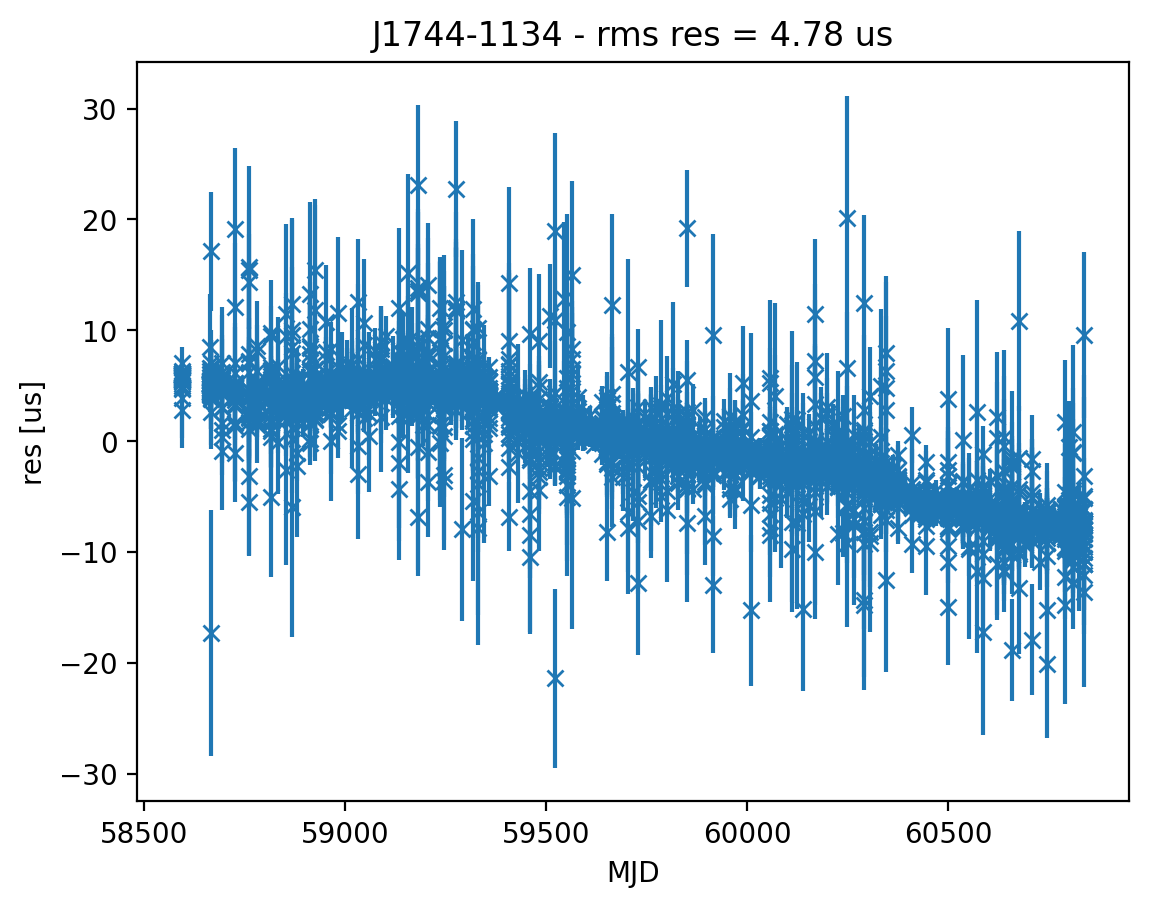

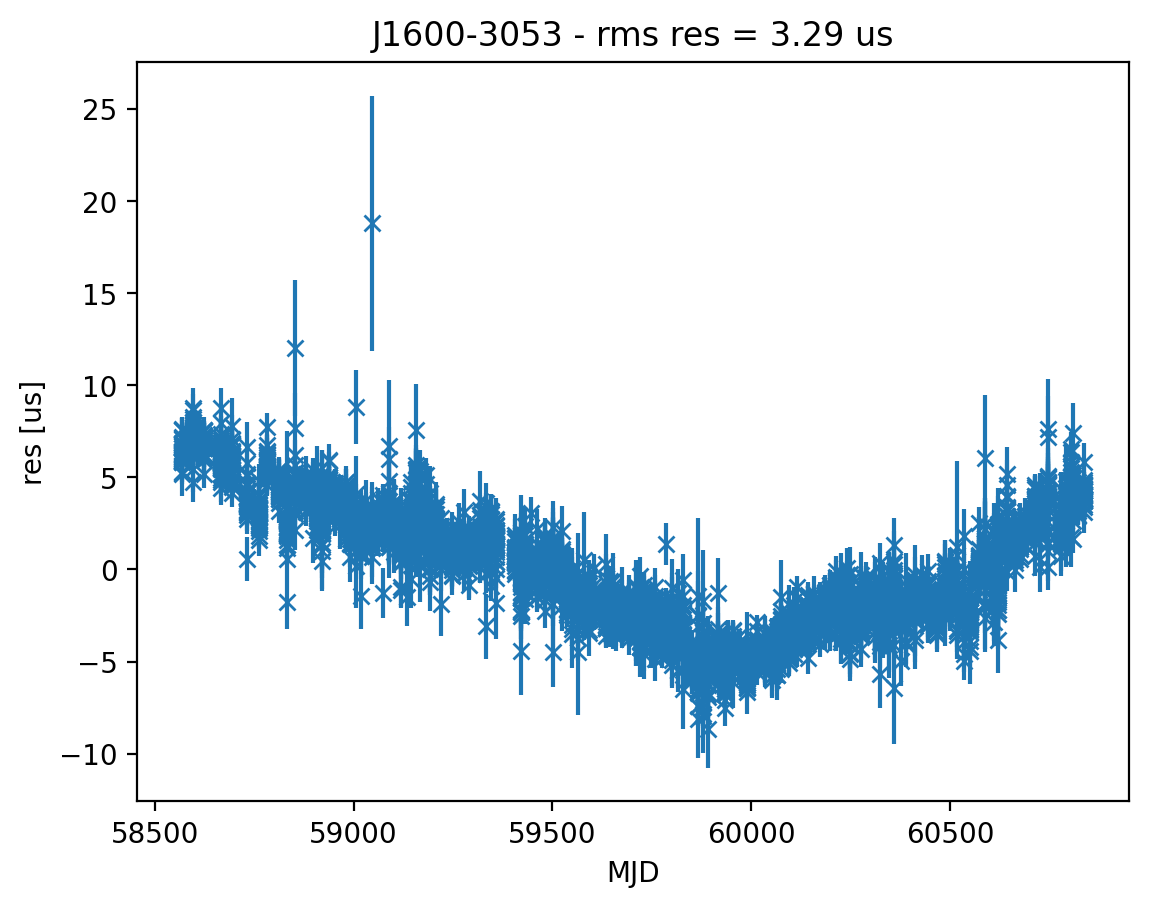

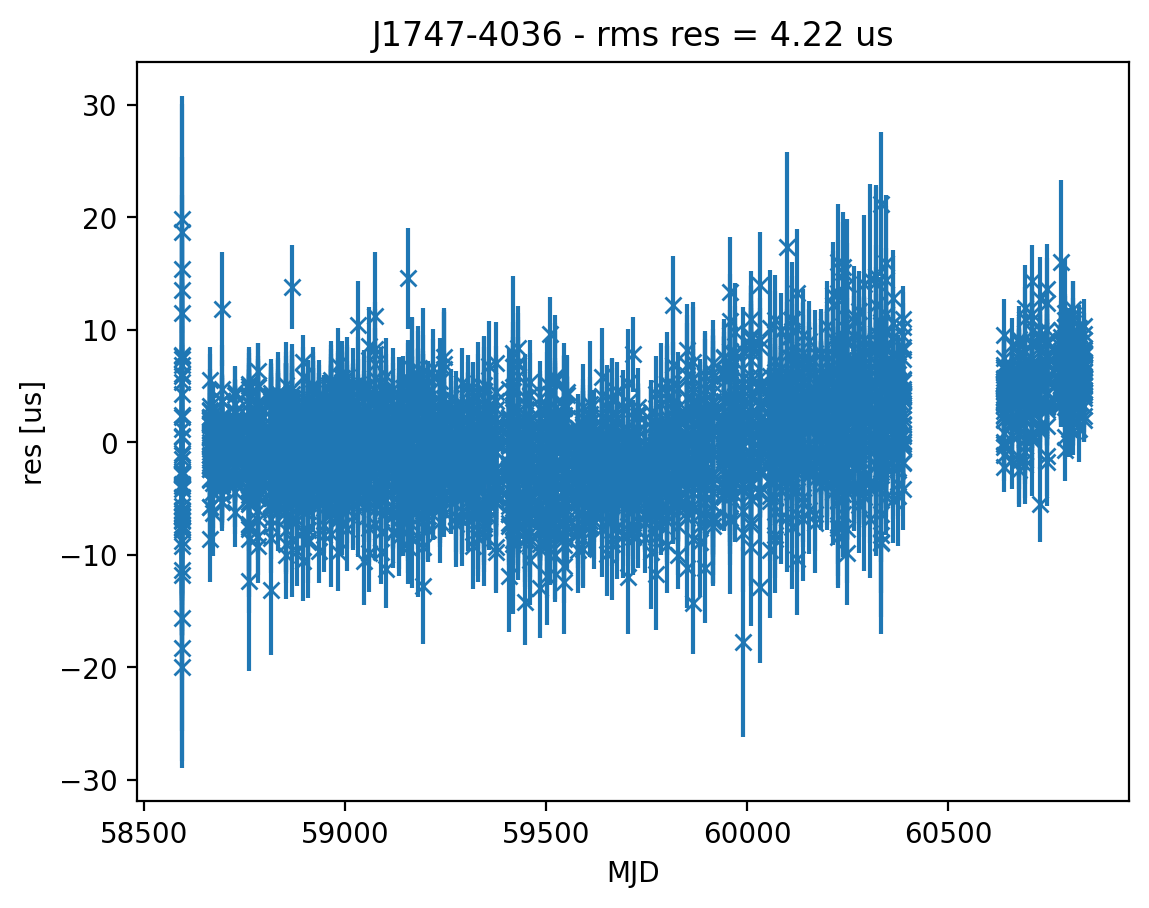

In [13]:
#plot residuals to check GWB injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [14]:
#Blind injection of CW parameters based on old simms. Need to check that this is not a terrible dict to use.

cw_p_dict = {
    'gwtheta': 1.75,  
    'gwphi': 5.,  
    'mc': 5e9,  
    'dist': 60, 
    'fgw': 2e-8, 
    'phase0': 0.0,
    'psi': np.pi/4.0,
    'inc': 0.0,
}

In [15]:
tref = np.min([p.toas().min() for p in psrs])

In [16]:
add_cgw(psrs, cw_p_dict, tref, iters=10)

J1125-6014
J1737-0811
J2229+2643
J1101-6424
J1421-4409
J1036-8317
J2124-3358
J1744-1134
J1600-3053
J1747-4036


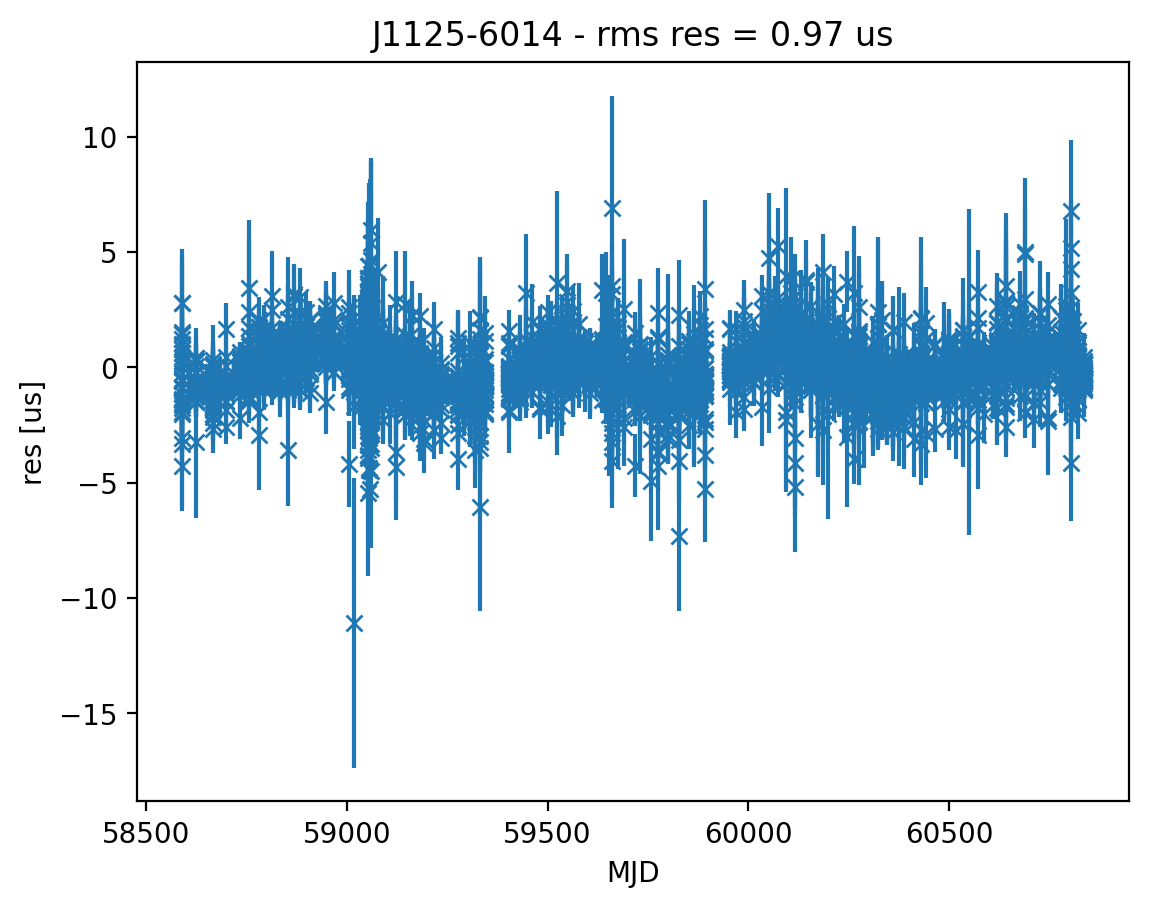

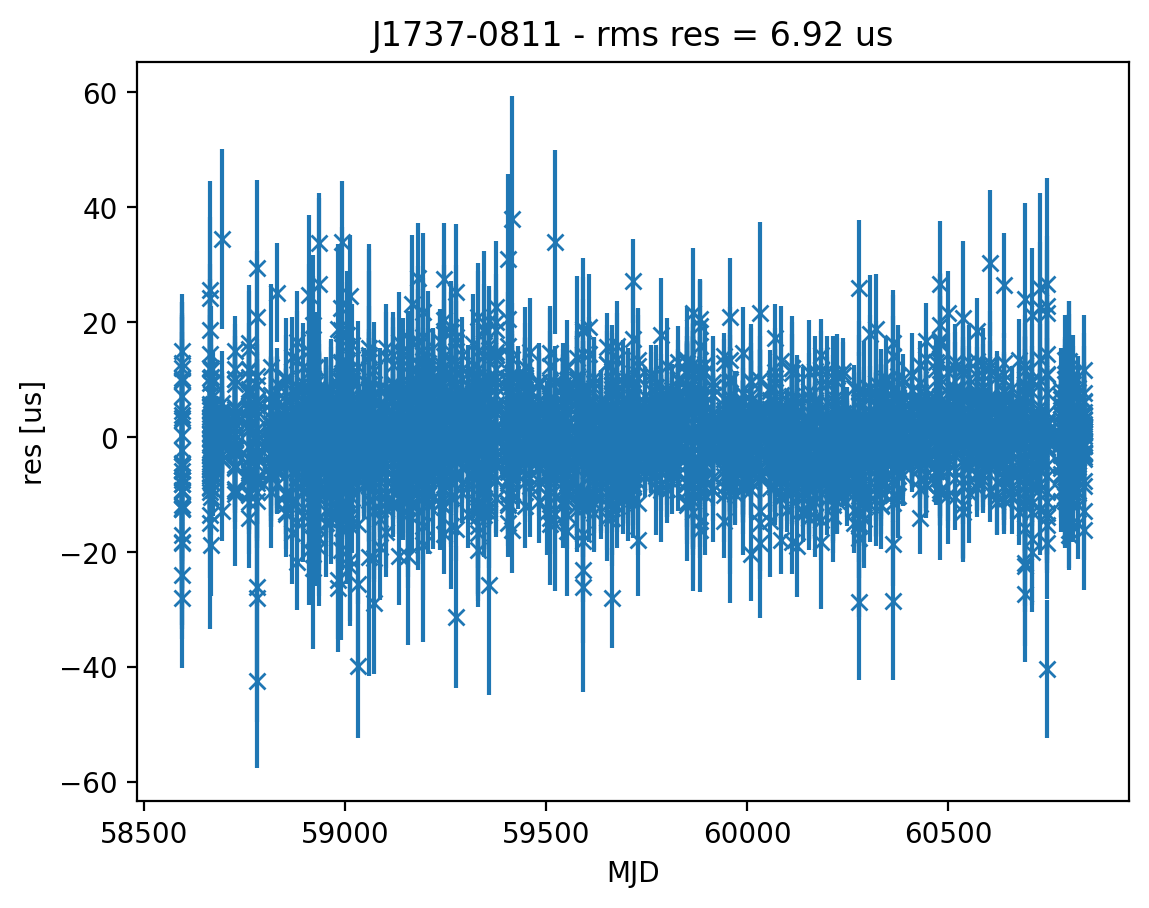

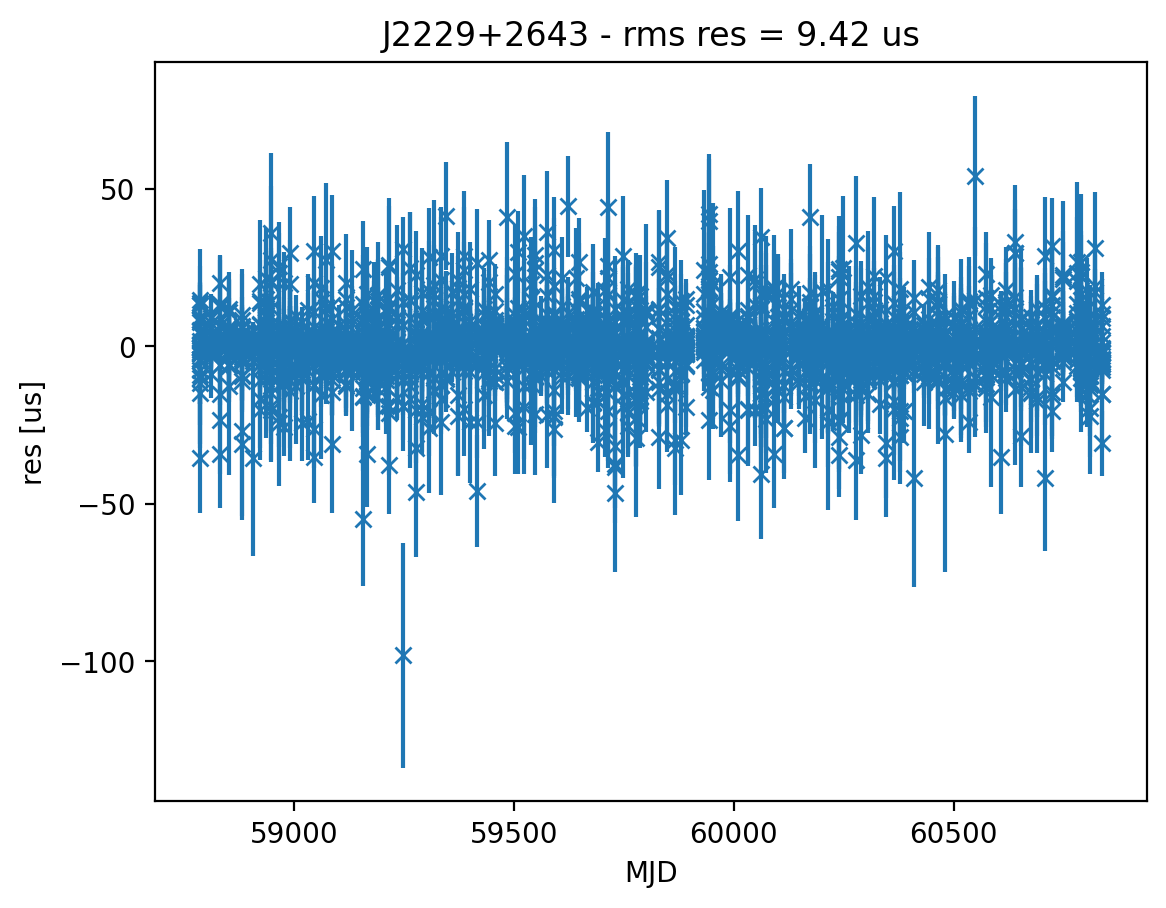

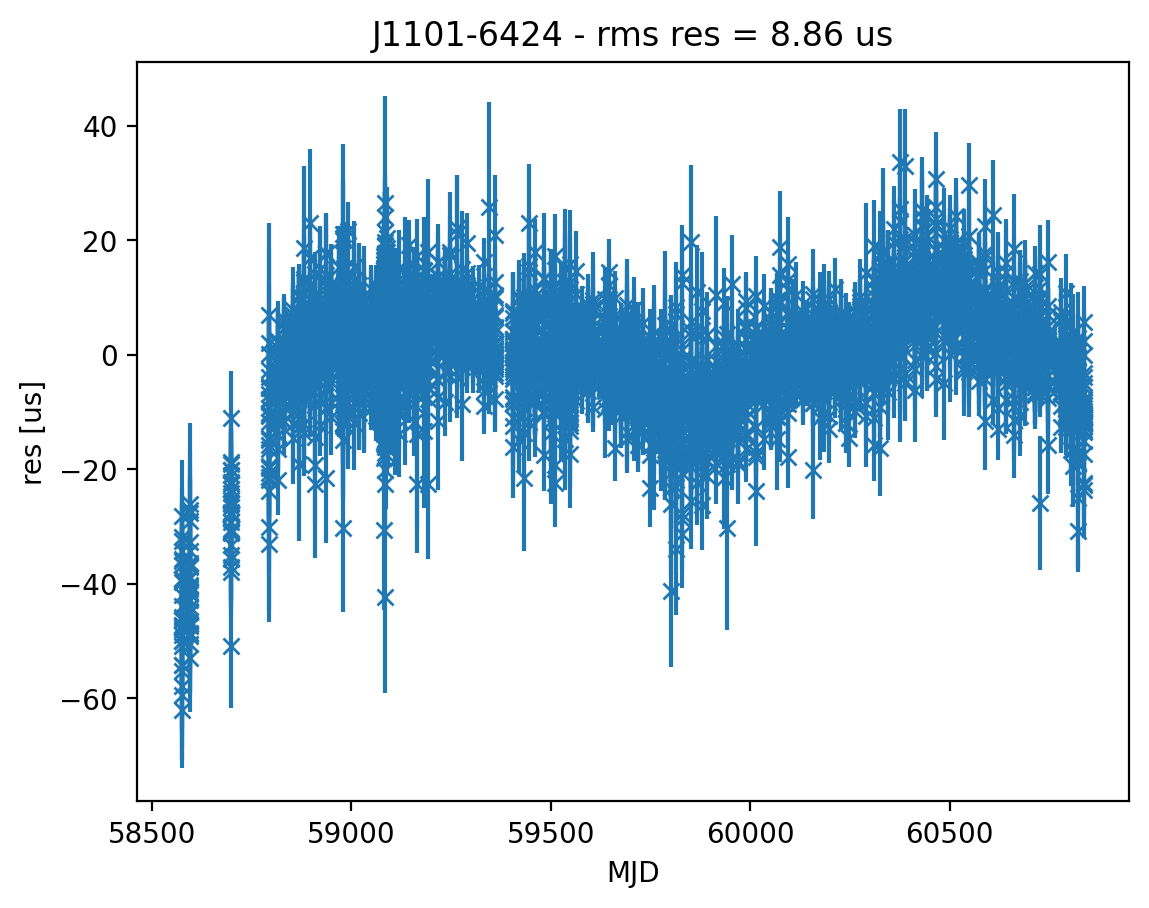

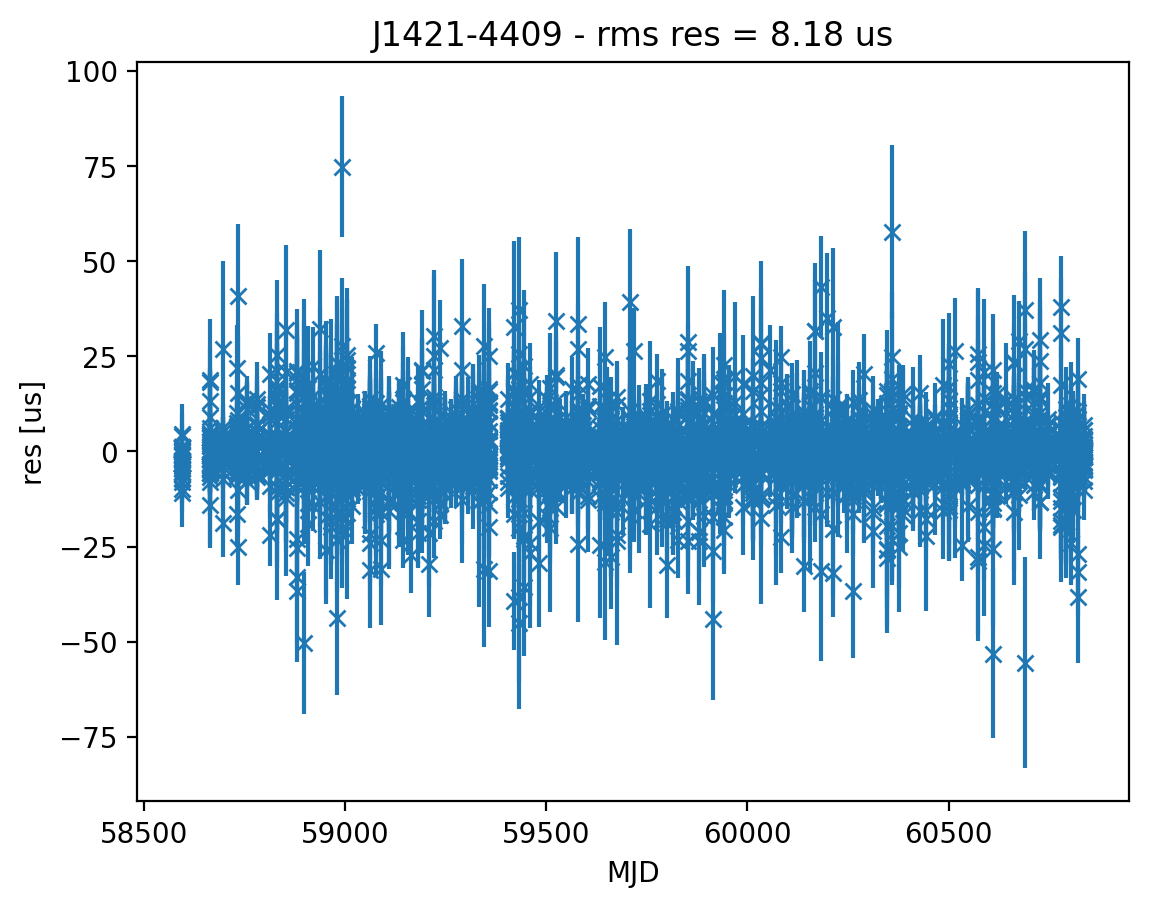

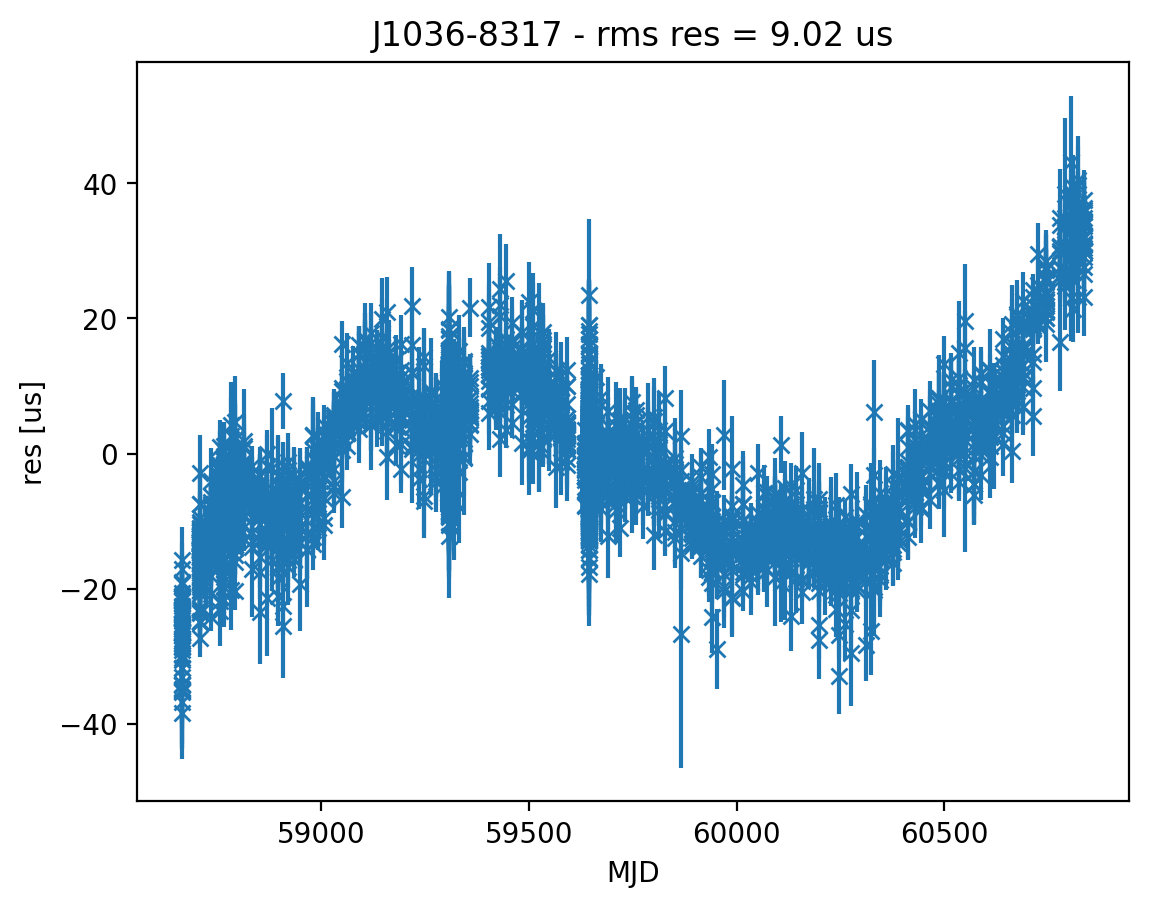

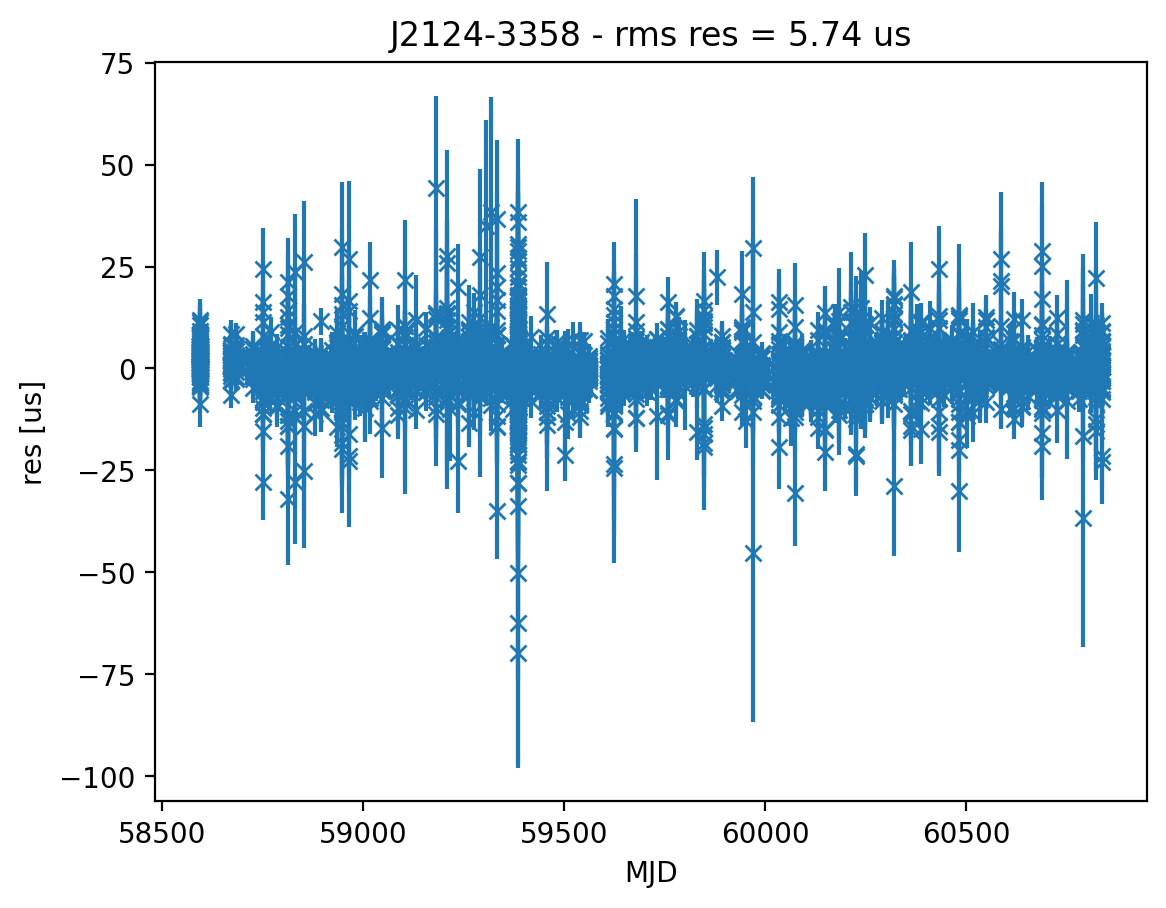

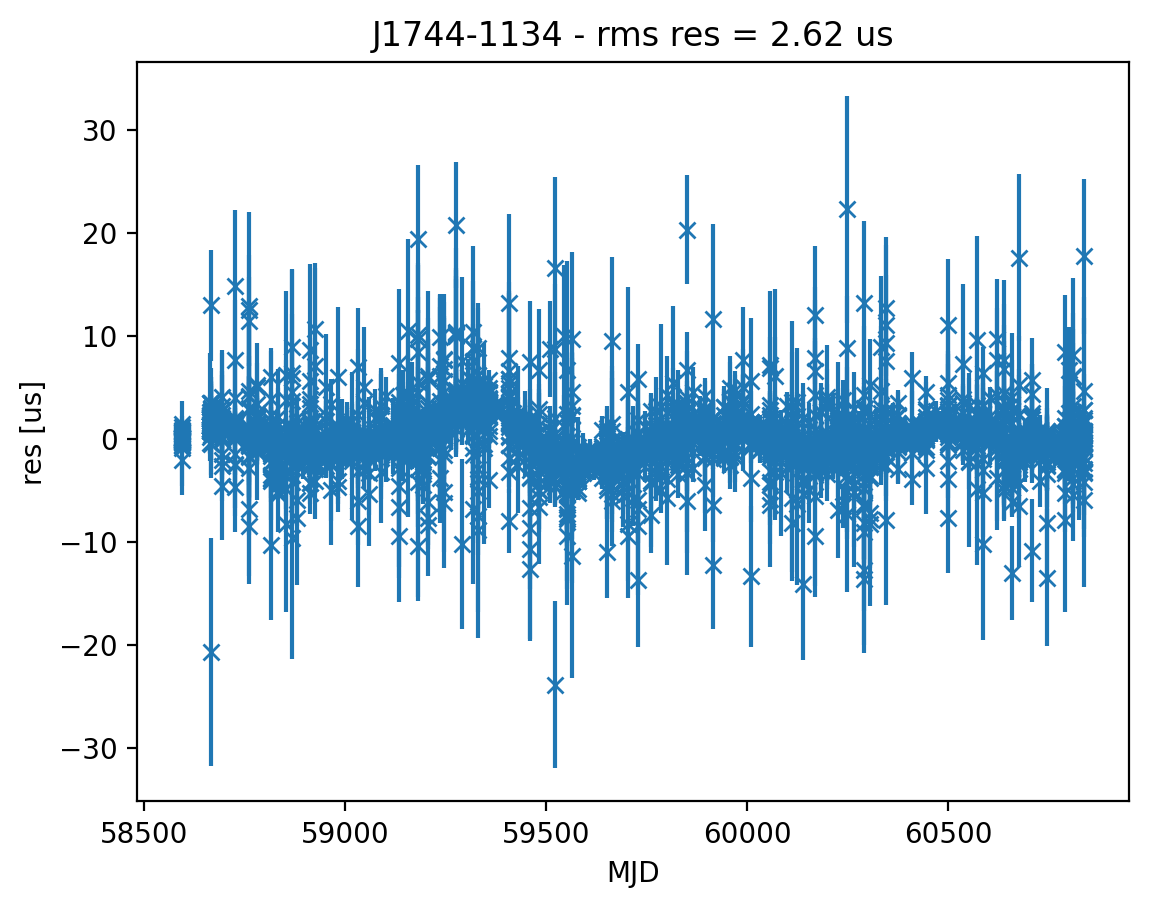

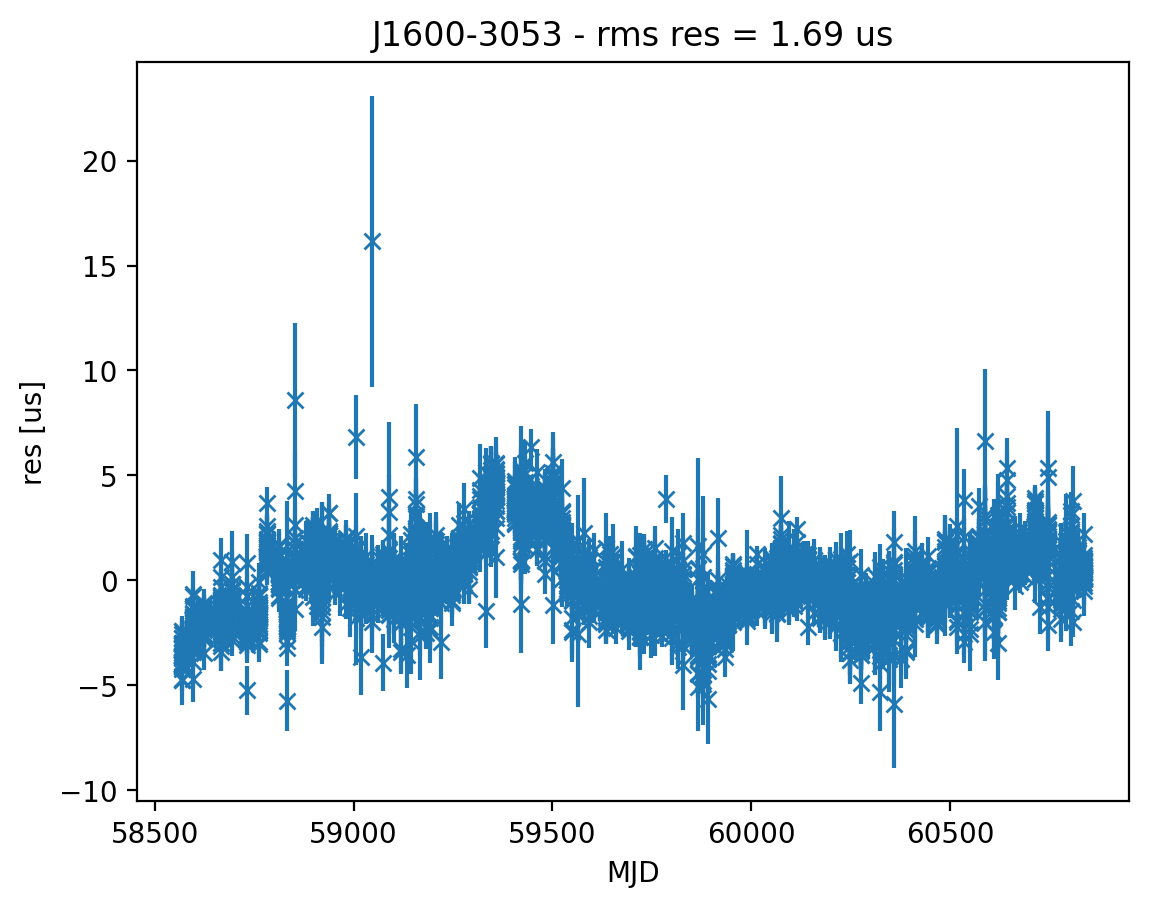

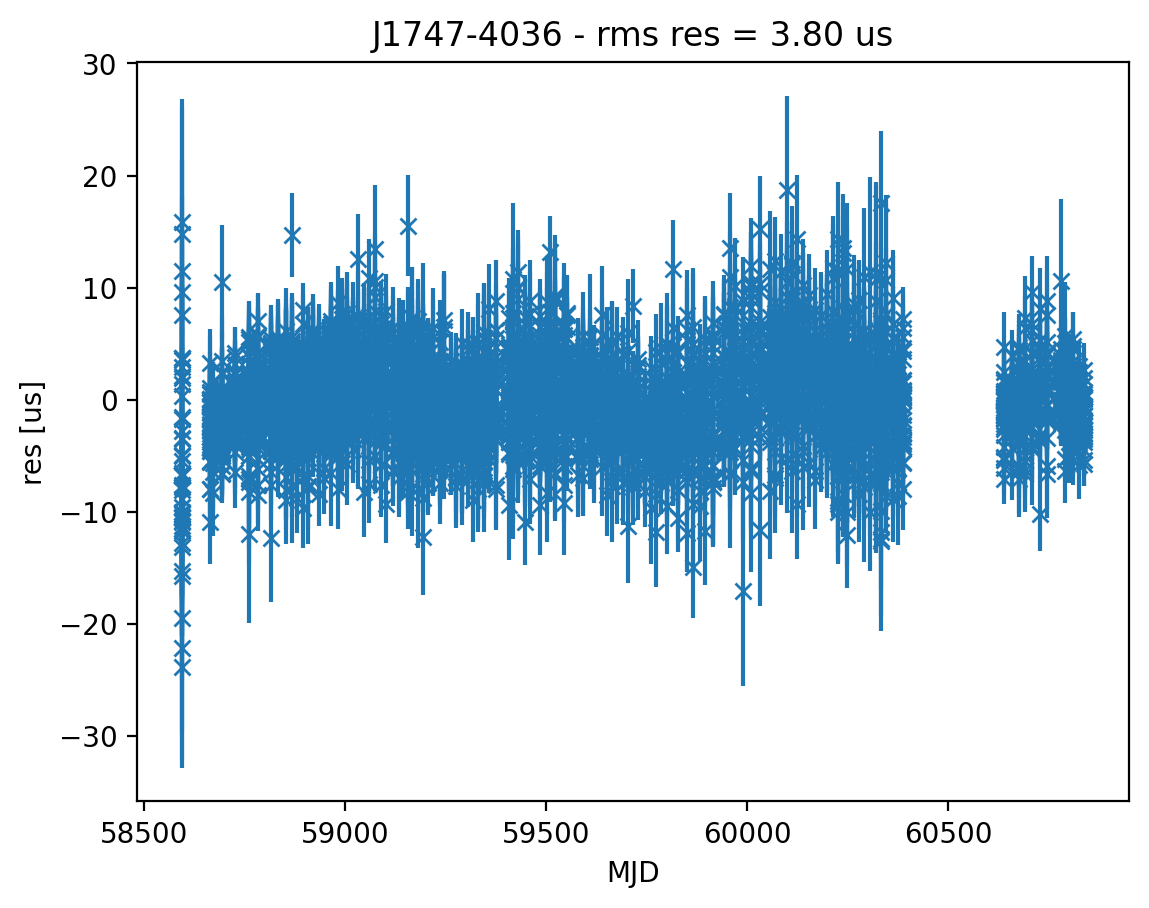

In [17]:
#plot residuals to check CW injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [18]:
psrs

In [19]:
# can save your simulated timfiles if you so desire
# (should be in libstempo format)
# change directory to save to as you wish
import time

def save_sims(psrs, outdir):
    """ Save simulated timing files.
    """
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    for p in psrs:
        p.savepar(outdir + p.name + '_simulated.par')
        p.savetim(outdir + p.name + '_simulated.tim')
        time.sleep(0.5)
save_sims(psrs, outdir='./partim_sim/')

[tempo2Util.C:396] Warning: [MISC1] Unknown parameter in par file:  DMDATA
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.
[preProcess.C:158] Warning: PSR J1125-6014 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J1737-0811 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J2229+2643 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J1101-6424 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June

In [20]:
trial ={}

In [21]:
trial.update(red_noise)

In [23]:
trial.update(dm_noise)

In [25]:
trial.update(red_noise)

In [27]:
ds = [red_noise, dm_noise, chrom_noise]
d = {}
for k in red_noise.keys():
  d[k] = tuple(d[k] for d in ds)

In [29]:
import pickle

# Save the dictionary to a pickle file
with open("noise_inj.pkl", "wb") as f: # 'wb' for write binary
    pickle.dump(d, f)

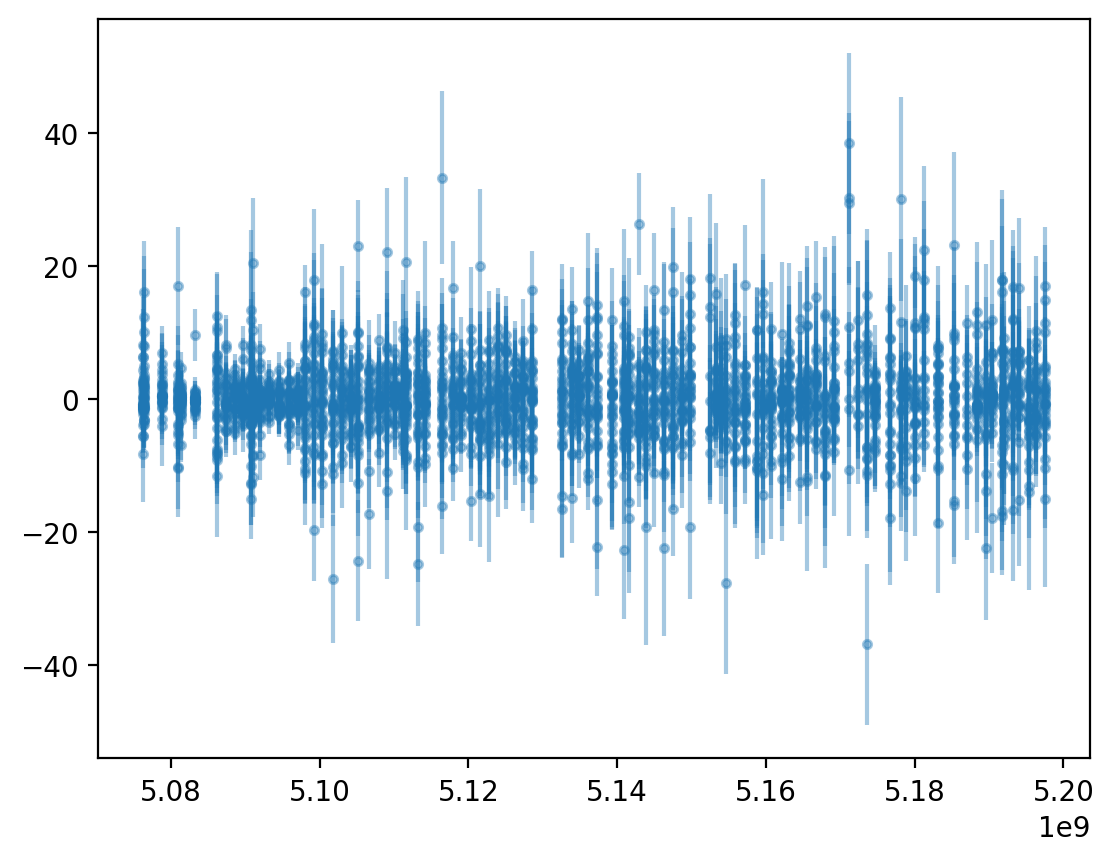

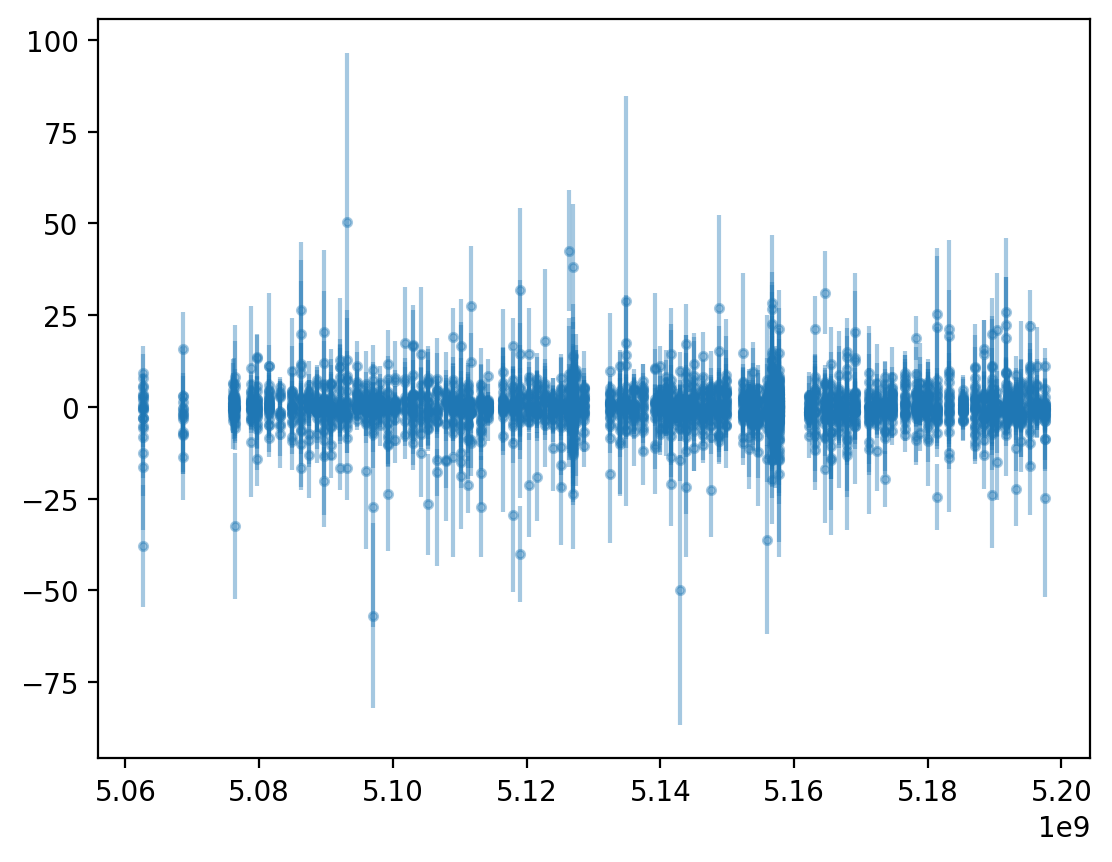

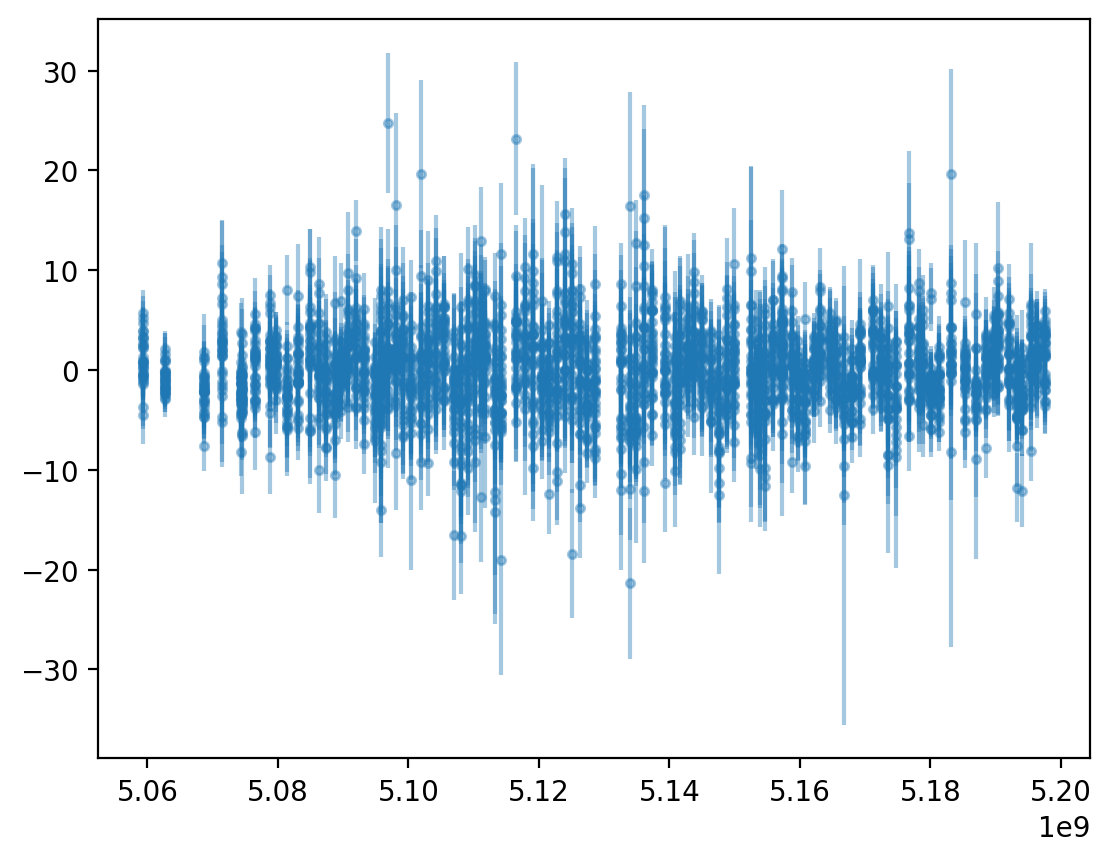

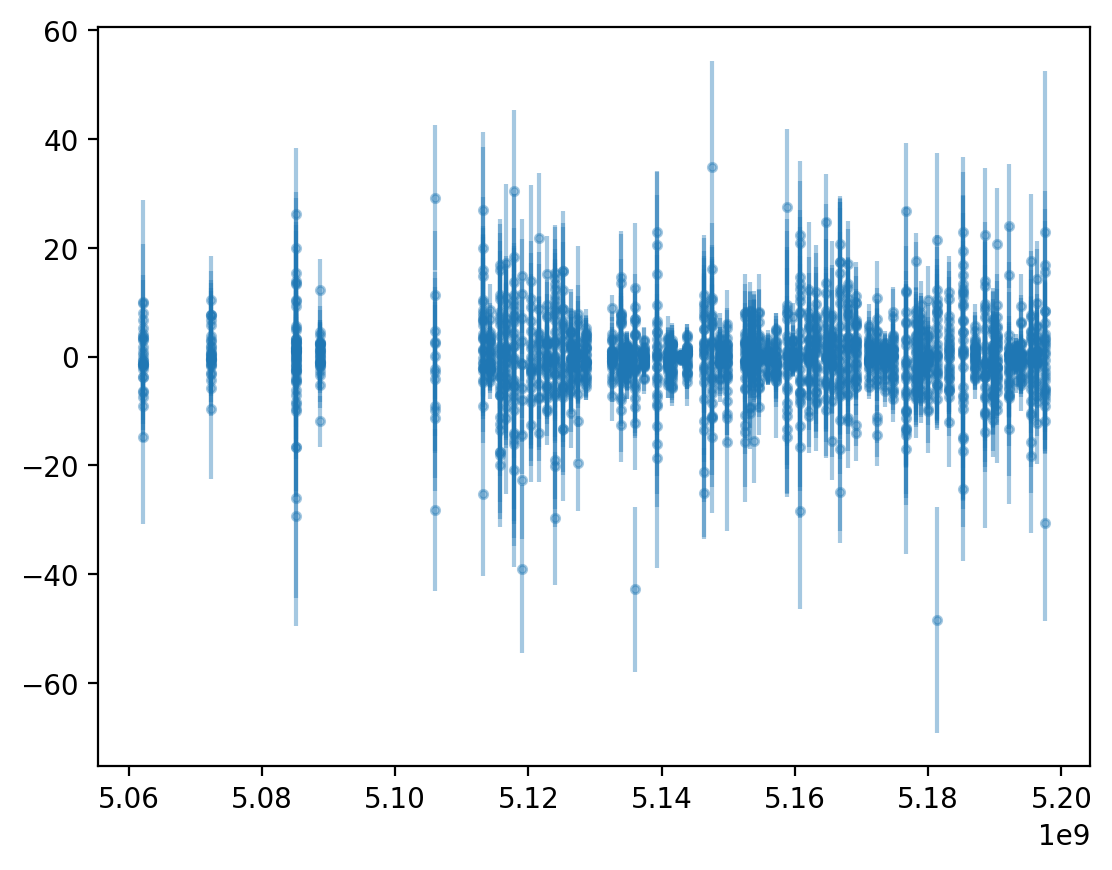

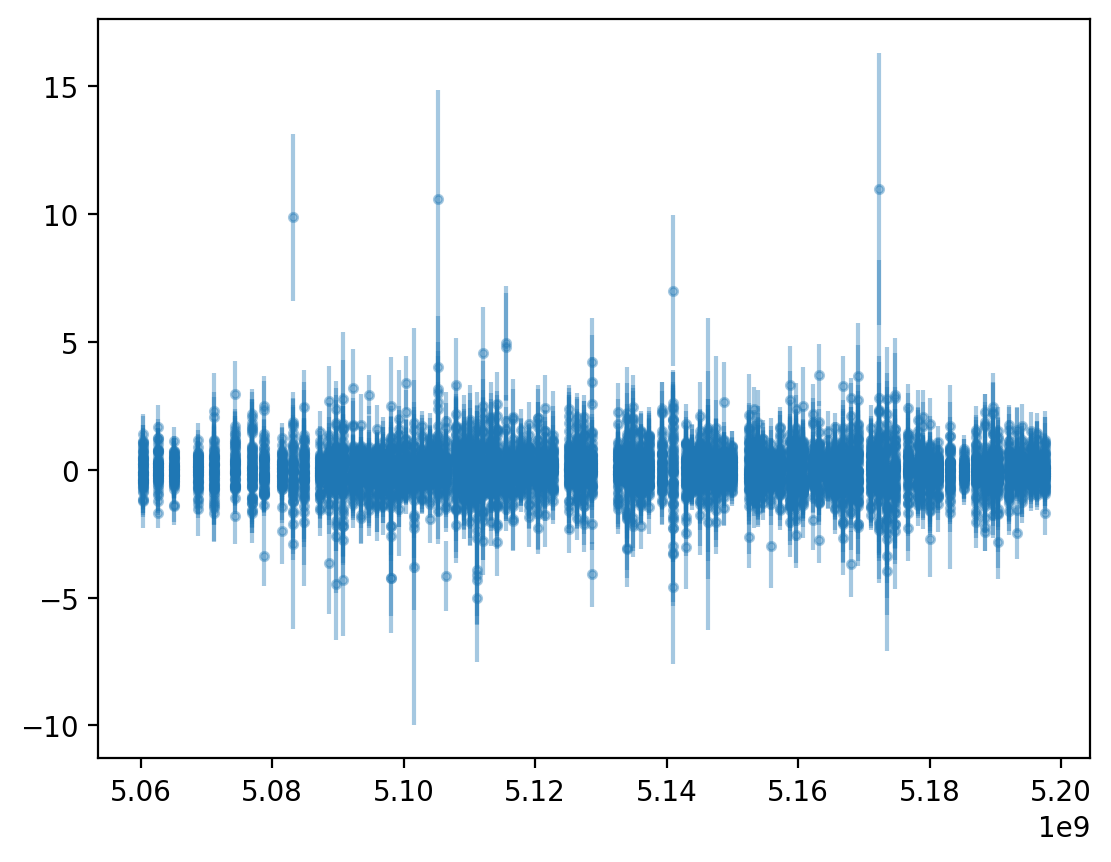

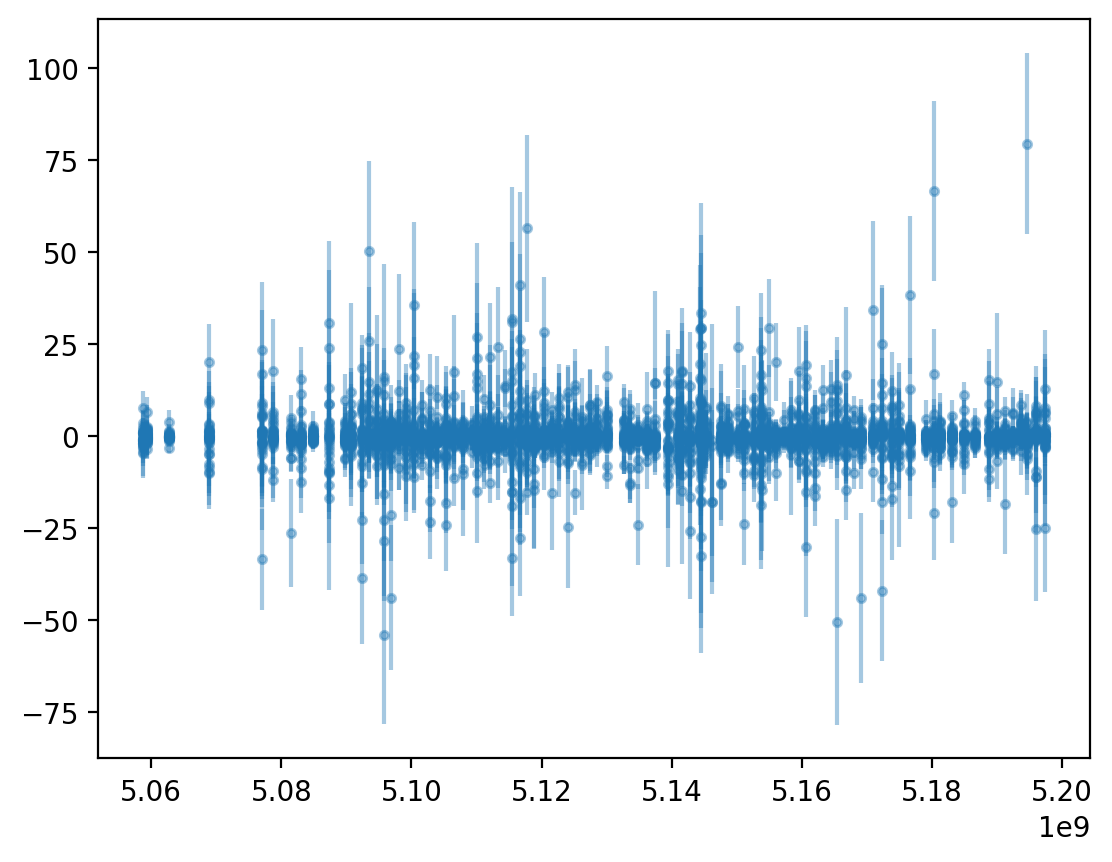

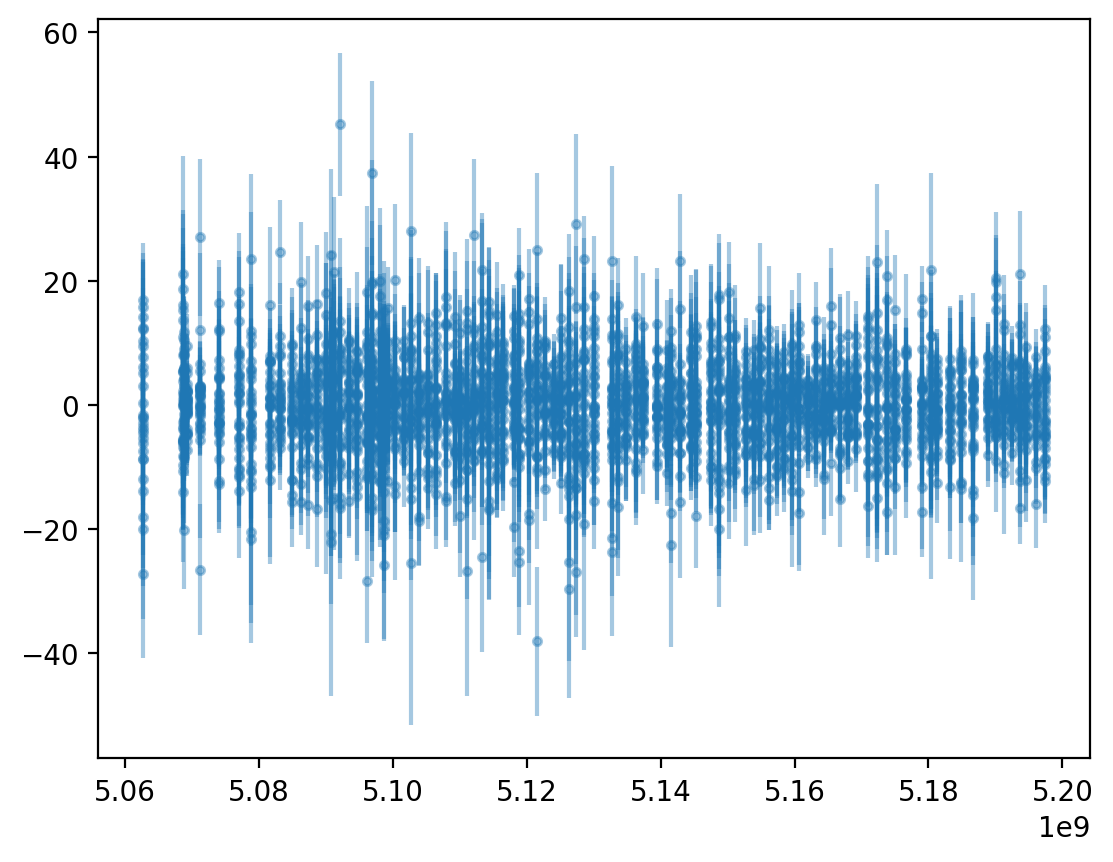

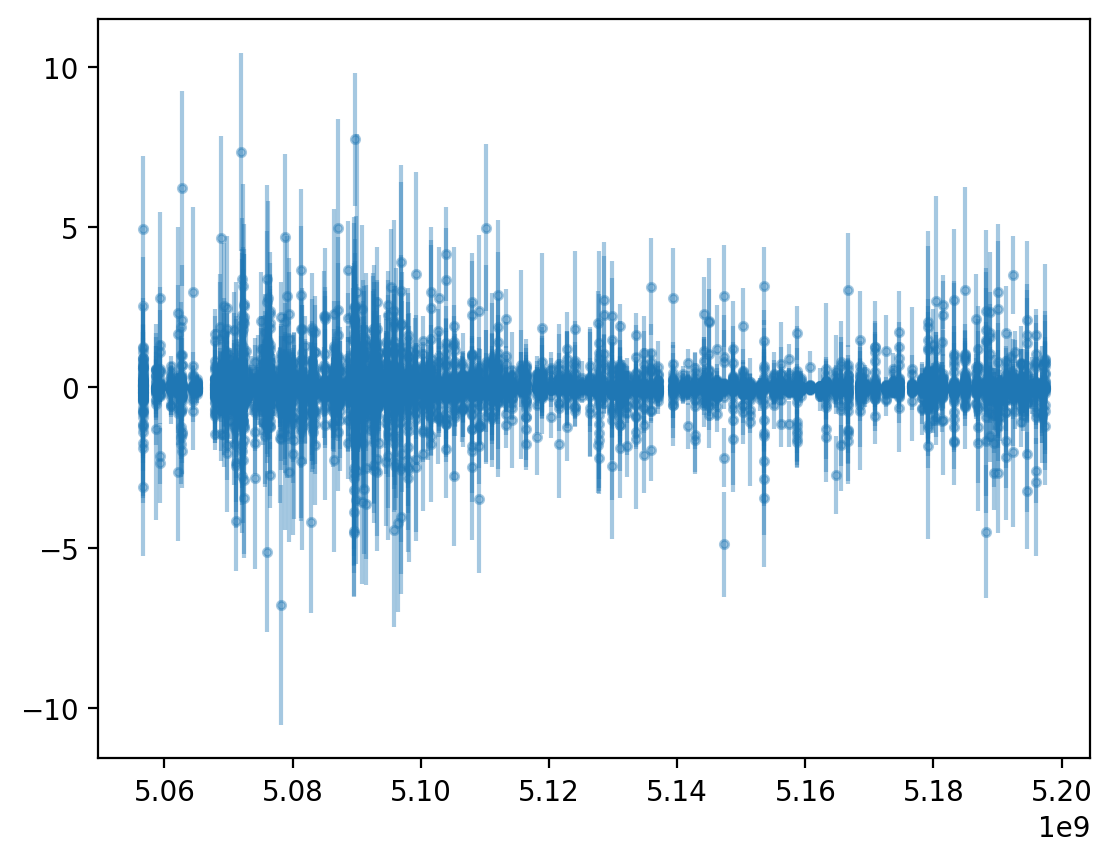

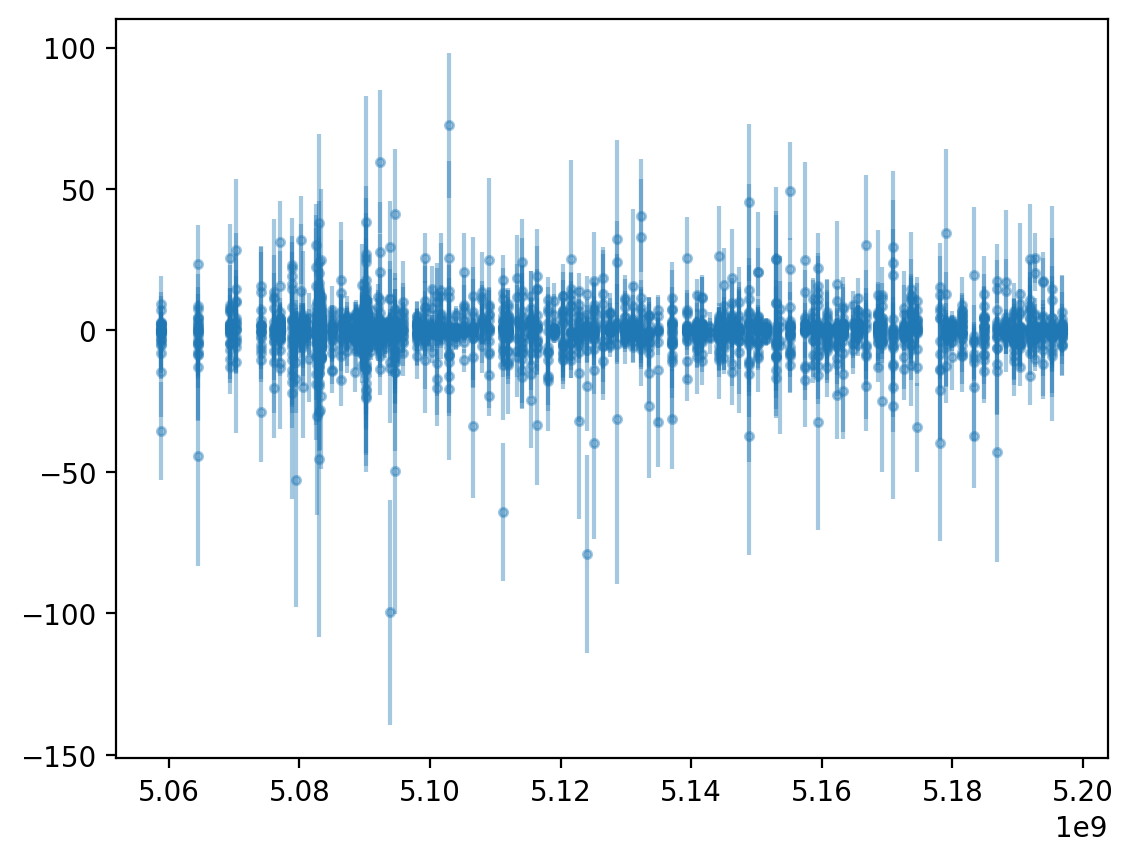

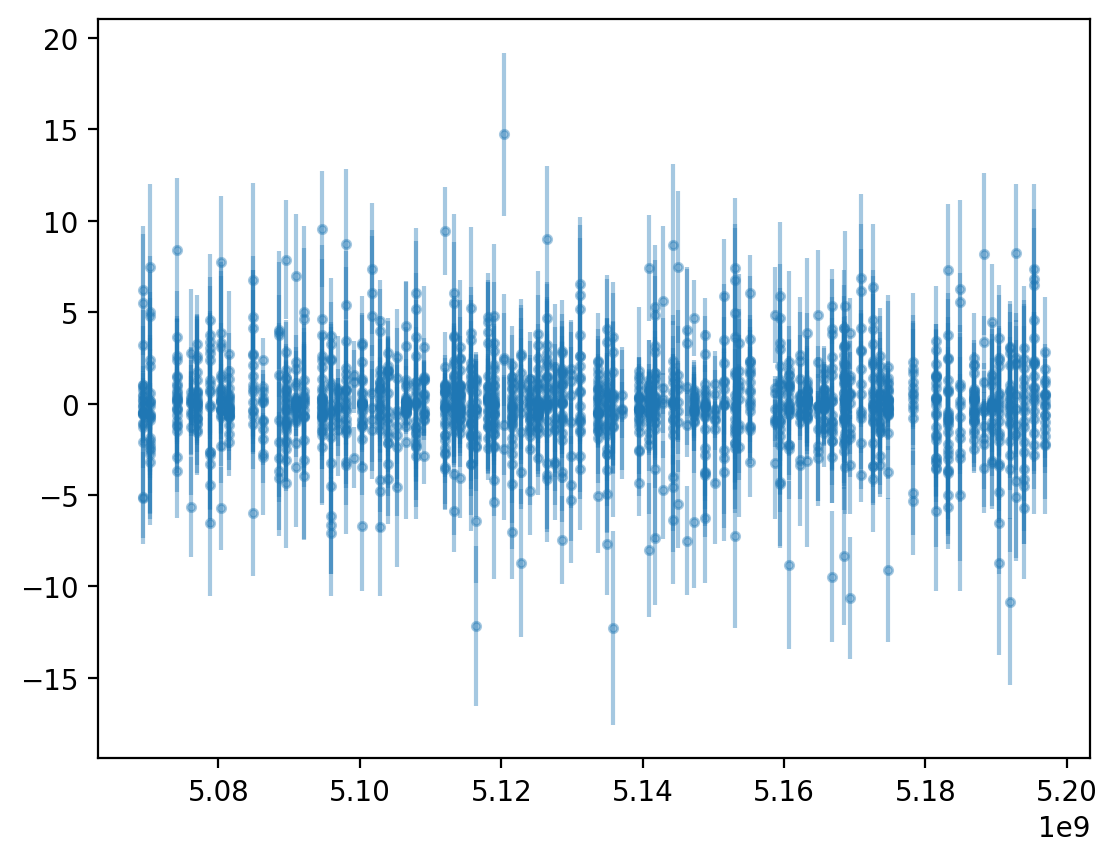

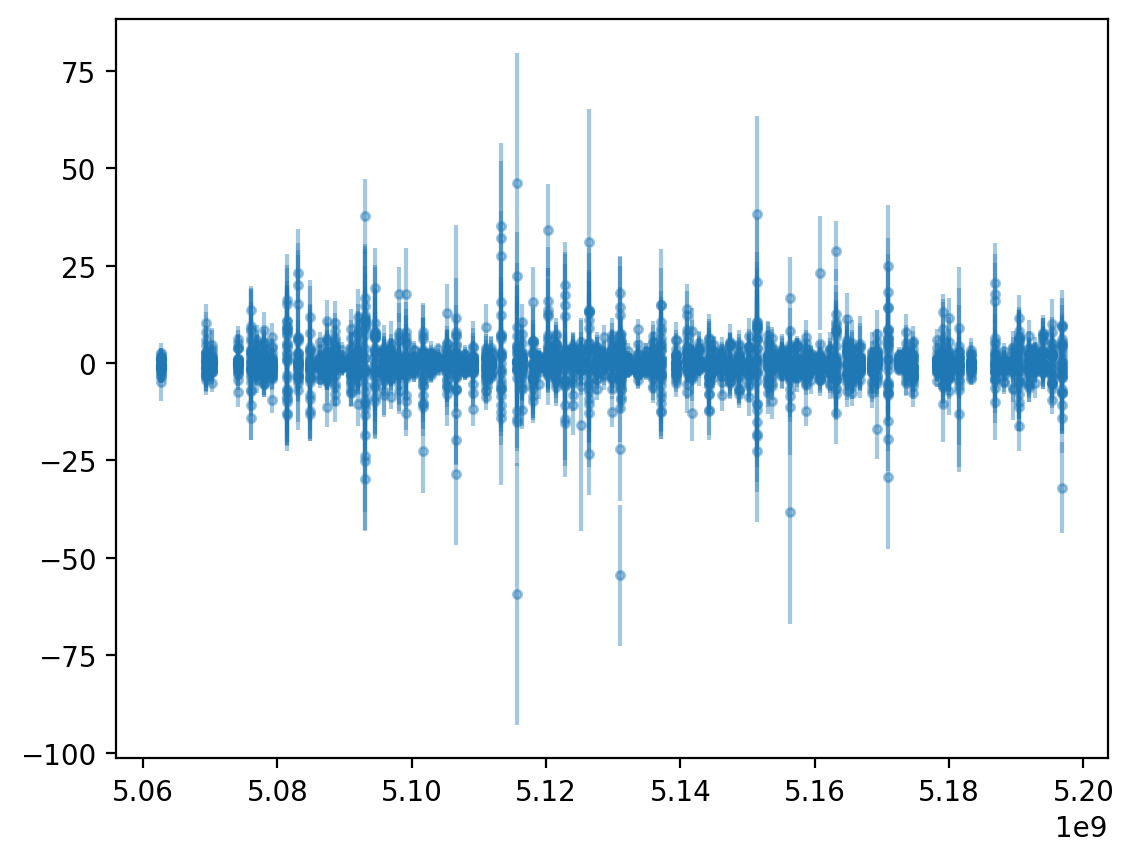

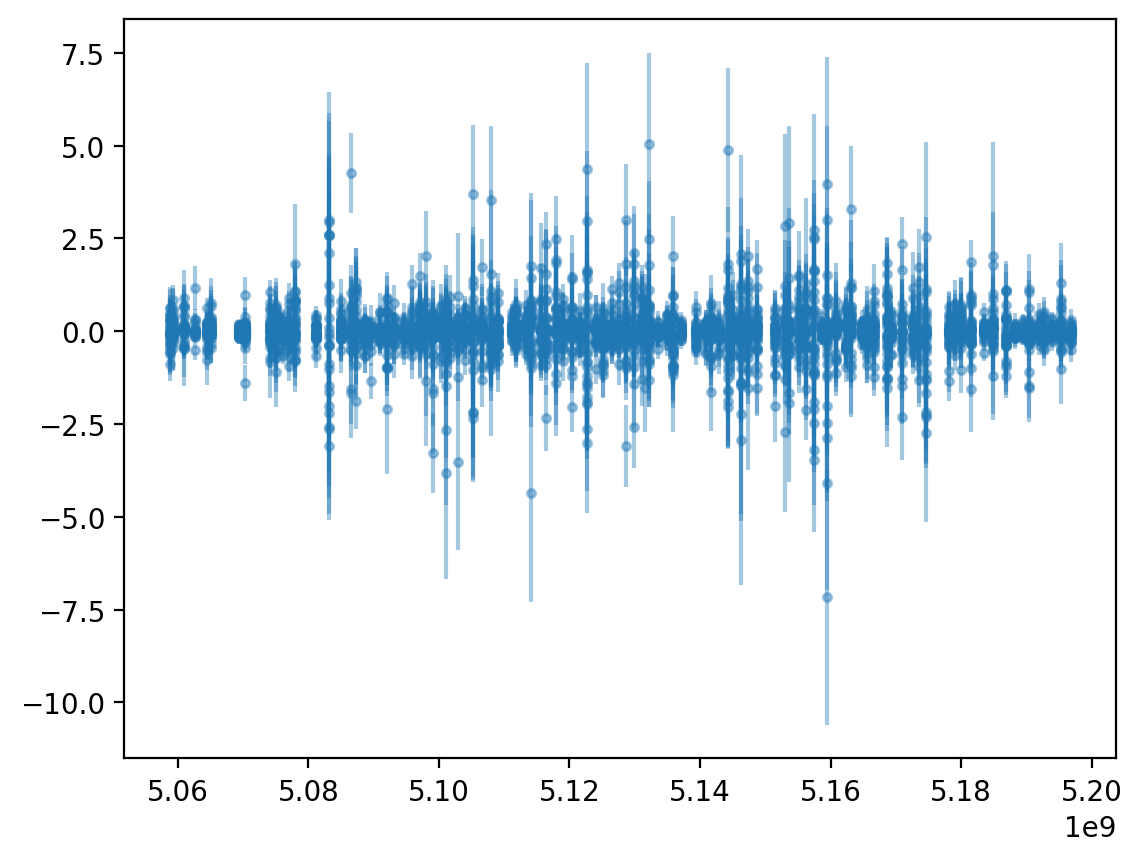

In [7]:
# convert libstempo pulsar objects into enterprise pulsar objects
Epsrs = lt2ent(psrs)
    
# can also plot residuals from enterprise pulsar objects
for i, p in enumerate(Epsrs):
    plt.figure(i)
    plt.errorbar(p.toas, 
                 p.residuals/1e-6, 
                 p.toaerrs/1e-6, 
                 fmt='.', alpha=0.4);
plt.show()

In [55]:
dir(psrs[0])

['__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_dimensionfy',
 '_fit',
 '_inputobservatory',
 '_inputobsfreq',
 '_inputtoaerrs',
 '_inputtoas',
 '_readfiles',
 '_readflags',
 '_readpars',
 '_set_observation_from_input',
 '_setstring',
 '_timeify',
 'add_phasejump',
 'batCorrs',
 'binarydelay',
 'binarymodel',
 'chisq',
 'clock',
 'deleted',
 'deletedmask',
 'designmatrix',
 'earth_ssb',
 'elevation',
 'ephemeris',
 'errs',
 'excludepars',
 'filename',
 'fit',
 'flags',
 'flagvals',
 'formbats',
 'formresiduals',
 'freqs',
 'jupiter_ssb',
 'mars_ssb',
 'mercury_ssb',
 'name',
 'ndim',
 'neptune_ssb',
 'nobs',
 'noisemodel',
 'nphasejumps',
 'observatory_earth',


In [20]:
p.savepar

AttributeError: 'Tempo2Pulsar' object has no attribute 'savepar'

In [ ]:
#for p in psrs:
#    p.savetim('/fred/oz002/users/mmiles/MPTA_GW/simmed_psrs/' + p.name + '_simulated.tim')